In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlite3 import connect
import seaborn
from matplotlib import ticker

In [2]:
%matplotlib inline

<h1 style='font-size: 50px; text-align:center;'>Mental Health in the Tech Industry and Drug Use</h1>

<h1 style='text-align:center; font-size:56px;'>Abstract</h1>

Mental illnesses are health conditions involving changes in emotion, thinking or behavior (or a combination of these). Mental illnesses are associated with distress and/or problems functioning in social, work or family activities.

Mental illness is common. In a given year:

 - nearly one in five (19 percent) U.S. adults experience some form of mental illness
 - one in 24 (4.1 percent) has a serious mental illness*
 - one in 12 (8.5 percent) has a diagnosable substance use disorder
Mental illness is treatable. The vast majority of individuals with mental illness continue to function in their daily lives.

*Serious mental illness is a mental, behavioral or emotional disorder (excluding developmental and substance use disorders) resulting in serious functional impairment, which substantially interferes with or limits one or more major life activities. Examples of serious mental illness include major depressive disorder, schizophrenia and bipolar disorder.

In this project, we will analyze the Mental Health in the Tech Industry dataset along with the Drug Use by Age dataset. The questions that we will want the answer of are:

 - **Question 1:** *What is the rate of people who experience some form of mental illness? Is it less or more than 19 percent?*
 - **Question 2:** *Does the rate of mental health disorder rate increase as the age increases?*
 - **Question 3:** *Do people in an age group with more occurences of mental health disorder consume more alcohol or drugs than people in age groups that have less occurences of mental health disorder?*
 - **Question 4:** *Does the company size affect the rate of mental health disorder and the will of people to share their problem?*

# 1. Reading the dataset

The dataset is consisted of 3 SQLite tables - Answers, Questions and Survey. For the purpuse of this project we will only use the first two tables, because the third table doesn't bring any useful information.

In [3]:
conn = connect('data/mental_health.sqlite')

The Answers table contains 4 columns - **AnswerText**(*The answer of a certain question*), **SurveyID**(*The year the survey is conducted*), **UserID**(*The ID of the person that took the survey*) and **QuestionID**(*The ID of the question, which can be used to see the question text in the Questions table*).

In [4]:
answers = pd.read_sql('SELECT * FROM Answer', conn)

In [5]:
answers

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


The names of the columns can be transformed to more *pythonic*. The column **SurveyID** is basically the year when the survey was conducted, so the name is changed to just year.

In [6]:
answers.columns = ['answer', 'year', 'user_id', 'question_id']

The Questions table contains 2 columns - **questiontext**(*The actual question that every person answered*) and **questionid**(*The ID of the question, which is the same as **the question_id** from the Answers table*).

In [7]:
questions = pd.read_sql('SELECT * FROM Question', conn)

In [8]:
questions

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [9]:
questions.columns = ['question', 'question_id']

There are a lot of answers that are **-1**, which is considered as ***NaN***. Because of the fact that the answers are categorical variables except the age, the ***-1*** values will be removed from the data.

In [10]:
answers = answers.drop(answers[answers.answer=='-1'].index)

In [11]:
answers

,answer,year,user_id,question_id
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


56598 answers were removed from the data. The advantage of this dataset is that for every answer of every question of every user there is separate row. That way, when the **-1** values were removed, they didn't influence the other data.

<AxesSubplot:xlabel='year', ylabel='Count'>

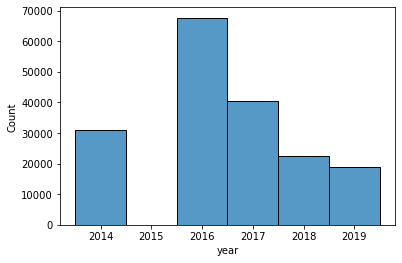

In [12]:
seaborn.histplot(answers.year, discrete=True)

There were no survey conducted in 2015. The most answers are from 2016 and the least from 2019.

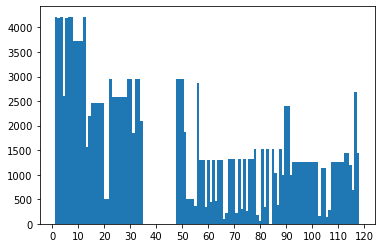

In [13]:
plt.hist(answers.question_id, bins=118)
plt.xticks(range(0, 121, 10))
plt.show()

In [14]:
answers.question_id.value_counts().describe()

count     104.000000
mean     1733.653846
std      1139.524861
min        60.000000
25%      1146.000000
50%      1326.000000
75%      2590.000000
max      4218.000000
Name: question_id, dtype: float64

Some of the quesions have far less answers compared to others, howerver, they might bring some valuable information, so we will keep them.

# 1. Distribution of questions' answers

Every time we want to display the the counts of observations in each categorical bin, we will use the **seaborn.countplot()** function. For the plot title we will use the question from the Questions table. We access the question by index, however, there is a gap in the question ids, but we will deal with that later

In [15]:
def display(data, q):
    seaborn.countplot(x=data.answer)
    plt.title(questions.question[q])
    plt.show()

For every question there will be separate variable.

# 1.1 Distribution of ages

In [16]:
ages = answers[answers.question_id==1]

In [17]:
ages.answer = ages.answer.astype(np.int64)

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
ages = ages[(ages.answer >= 14) & (ages.answer <= 67)]

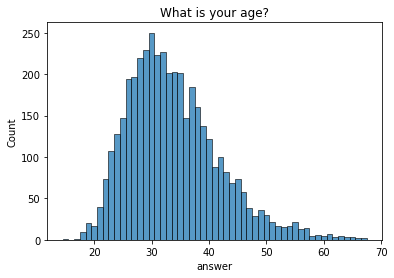

In [19]:
seaborn.histplot(ages.answer, discrete=True)
plt.title(questions.question[0])
plt.show()

In [20]:
ages.answer.describe()

count    4201.000000
mean       33.824090
std         8.010633
min        15.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        67.000000
Name: answer, dtype: float64

We can see that the distrubution of people's age looks like **binomial distribution**. Ages under 14 and over 67 are removed, because they are considered to not be working because either they are too young or they are at retirement age.

# 1.2 Distribution of genders

In [21]:
genders = answers[answers.question_id == 2]

In [22]:
genders.answer.unique()

array(['Female', 'Male', 'Male-ish', 'Trans-female',
       'something kinda male?', 'queer/she/they', 'non-binary', 'Nah',
       'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender',
       'Guy (-ish) ^_^', 'male leaning androgynous', 'Trans woman',
       'Neuter', 'Female (trans)', 'queer', 'A little about you', 'p',
       'ostensibly male, unsure what that really means', 'Bigender',
       'Female assigned at birth', 'fm', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Other/Transfeminine',
       'Female or Multi-Gender Femme', 'Androgynous',
       'male 9:1 female, roughly', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'genderqueer woman', 'mtf', 'Queer', 'Fluid', 'Male/genderqueer',
       'Nonbinary', 'human', 'Unicorn', 'Male (trans, FtM)',
       'Genderflux demi-girl', 'female-bodied; no feelings about gender',
       'AFAB', 'Transgender woman', 'male', 'female', 'male/androgynous',
       'uh

In [23]:
male_p = ['Male', 'MALE', 'male', 'm']
female_p = ['Female', 'female', 'Woman-identified', 'fm']
others = [p for p in genders.answer.unique() if p not in male_p and p not in female_p]

In [24]:
genders = genders.replace(male_p, 'male')
genders = genders.replace(female_p, 'female')
genders = genders.replace(others, 'other')

In [25]:
genders.answer.value_counts()

male      3043
female    1026
other      125
Name: answer, dtype: int64

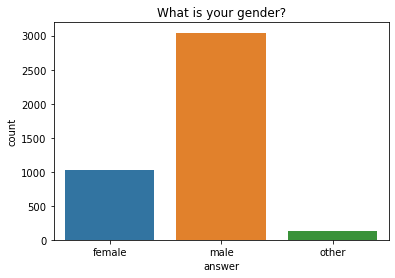

In [26]:
display(genders, 1)

Genders different from *male* and *female* are put into one category - *others*. As we can see, most of the people are *men* with considerable amount of *women*.

# 1.3 Distribution of countries

In [27]:
countries = answers[answers.question_id==3]

In [28]:
countries.answer = countries.answer.replace('United States', 'United States of America')

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


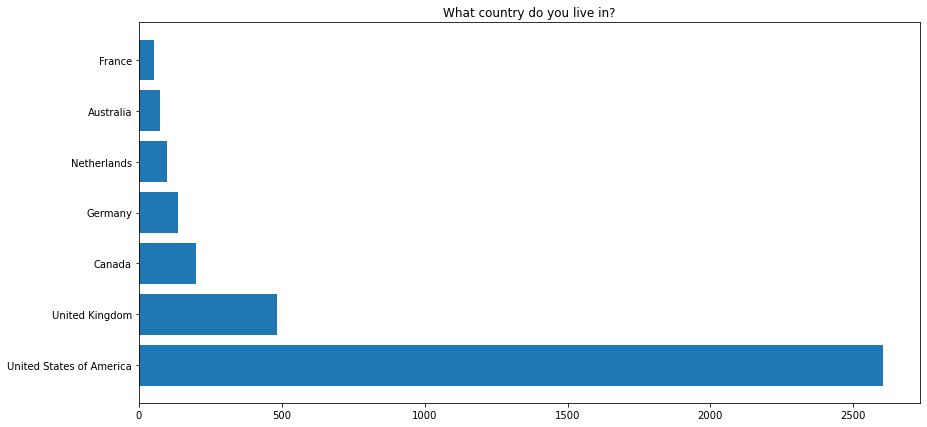

In [29]:
plt.figure(figsize=(14,7))
plt.barh(countries.answer.value_counts(ascending=False)[:7].index, countries.answer.value_counts(ascending=False)[:7])
plt.title(questions.question[2])
plt.show()

The top 5 countries that people live in are *The USA, the UK, Canada, Germany and Netherlands*.

# 1.4 Distribution of states in the USA

In [30]:
states_USA = answers[answers.question_id == 4]

In [31]:
states_USA.answer.value_counts()[:10]

California    382
Illinois      223
Washington    168
New York      146
Tennessee     121
Texas         119
Ohio          109
Michigan      108
Minnesota     101
Oregon         99
Name: answer, dtype: int64

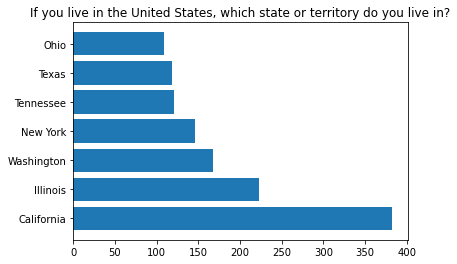

In [32]:
plt.barh(states_USA.answer.value_counts()[:7].index, states_USA.answer.value_counts()[:7])
plt.title(questions.question[3])
plt.show()

# 1.5 Distribution of employed and self-employed people

In [33]:
employment = answers[answers.question_id==5]

In [34]:
employment.answer = employment.answer.astype(np.int64)

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [35]:
employment.answer.value_counts()

0    3550
1     650
Name: answer, dtype: int64

In [36]:
employment.loc[employment.answer == 0, 'answer'] = 'Employed'
employment.loc[employment.answer == 1, 'answer'] = 'Self-employed'

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


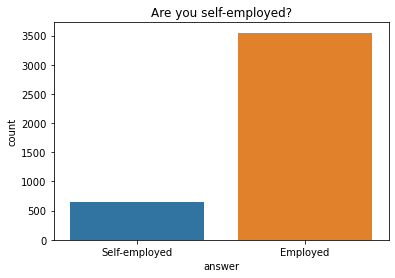

In [37]:
display(employment, 4)

# 1.6 Distribution of family history of mental illness?

In [38]:
family_history = answers[answers.question_id == 6]

In [39]:
family_history.answer.value_counts()

Yes             1868
No              1701
I don't know     649
Name: answer, dtype: int64

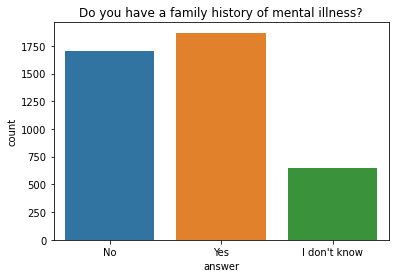

In [40]:
display(family_history, 5)

# 1.7 Distribution of people who sought treatment for mental health disorder

In [41]:
people_sought_treatment = answers[answers.question_id == 7]

In [42]:
people_sought_treatment.answer.value_counts()

1    2412
0    1806
Name: answer, dtype: int64

In [43]:
people_sought_treatment.answer = people_sought_treatment.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


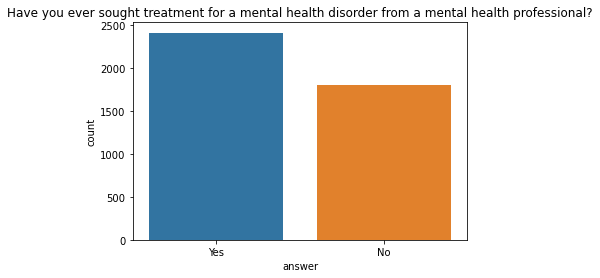

In [44]:
display(people_sought_treatment, 6)

# 1.8 Distribution of people in companies

In [45]:
people_in_companies = answers[answers.question_id == 8]

In [46]:
people_in_companies.answer.value_counts()

More than 1000    912
26-100            824
100-500           788
6-25              689
1-5               254
500-1000          247
Name: answer, dtype: int64

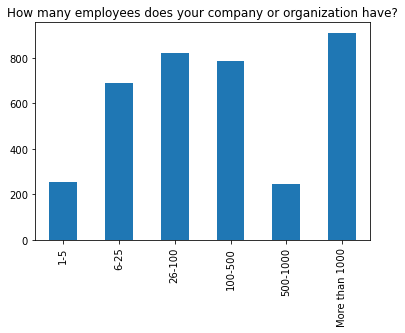

In [47]:
people_in_companies.answer.value_counts().loc[['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']].plot.bar()
plt.title(questions.question[7])
plt.show()

# 1.9 Distribution of tech companies

In [48]:
tech_companies = answers[answers.question_id == 9]

In [49]:
tech_companies.answer.value_counts()

1    2888
0     826
Name: answer, dtype: int64

In [50]:
tech_companies.answer = tech_companies.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


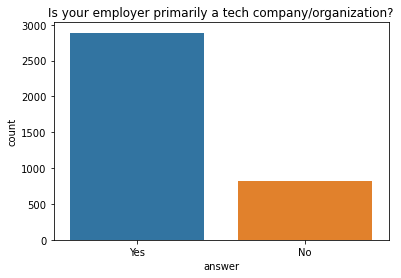

In [51]:
display(tech_companies, 8)

The name of the dataset is Mental Health in the Tech Industry, howewer, there are a significant amount of people who don't work in that industry.

# 1.10 Distribution of employers providing mental health benefits as part of healthcare coverage

In [52]:
mental_health_benefits = answers[answers.question_id == 10]

In [53]:
mental_health_benefits.answer.value_counts()

Yes                               1744
No                                 756
I don't know                       658
Don't know                         408
Not eligible for coverage / NA     148
Name: answer, dtype: int64

In [54]:
mental_health_benefits.answer = mental_health_benefits.answer.replace(["Don't know", "Not eligible for coverage / NA"], ["I don't know", "No"])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


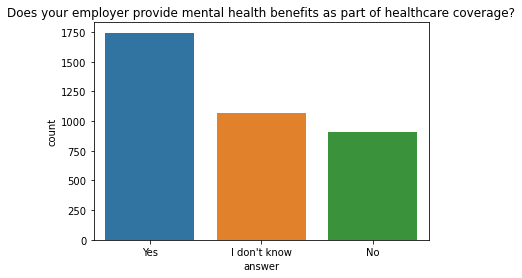

In [55]:
display(mental_health_benefits, 9)

# 1.11 Distribution of anonymity protection

In [56]:
anonymity_protection = answers[answers.question_id == 11]

In [57]:
anonymity_protection.answer.value_counts()

I don't know    1546
Yes             1135
Don't know       820
No               213
Name: answer, dtype: int64

In [58]:
anonymity_protection.answer = anonymity_protection.answer.replace("Don't know", "I don't know")

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


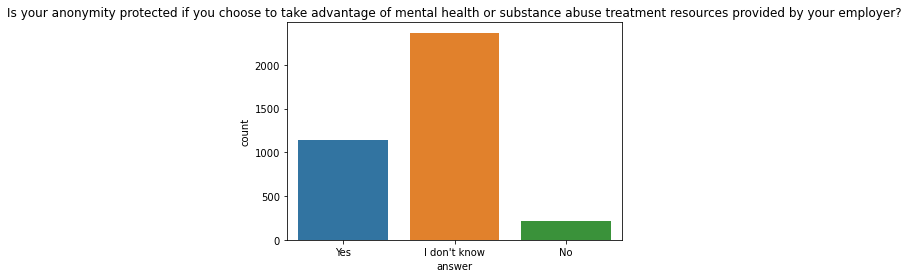

In [59]:
display(anonymity_protection, 10)

# 1.12 Distribution of openess of mental health issue in an interview

In [60]:
openess_to_mental_health_issue = answers[answers.question_id == 12]

In [61]:
openess_to_mental_health_issue.answer.value_counts()

No       2951
Maybe    1036
Yes       231
Name: answer, dtype: int64

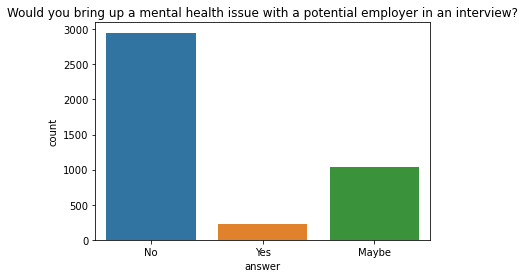

In [62]:
display(openess_to_mental_health_issue, 11)

Most of the people wouldn't bring up a mental health issue with a potential interview. This can be caused by many things, so it will be investigated later.

# *Less frequently asked questions*

# 1.13 Distibution of roles related to tech/IT in companies

In [63]:
roles_in_companies = answers[answers.question_id == 13]

In [64]:
roles_in_companies.answer.value_counts()

1    1471
0     100
Name: answer, dtype: int64

In [65]:
roles_in_companies.answer = roles_in_companies.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


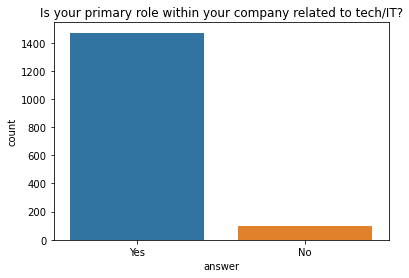

In [66]:
display(roles_in_companies, 12)

# 1.14 Distribution of options for mental health care awareness

In [67]:
mental_health_care_options_awareness = answers[answers.question_id == 14]

In [68]:
mental_health_care_options_awareness.answer.value_counts()

No               970
Yes              869
I am not sure    352
Name: answer, dtype: int64

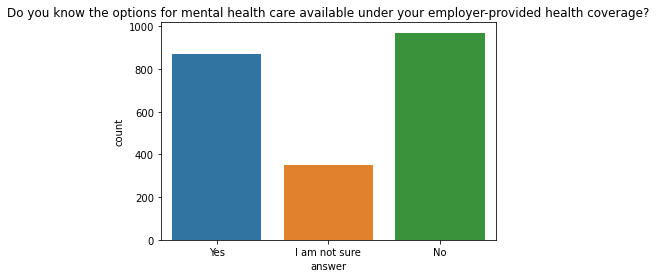

In [69]:
display(mental_health_care_options_awareness, 13)

# 1.15 Distribution of mental health discussion with employer

In [70]:
mental_health_discussion_employer_formally = answers[answers.question_id == 15]

In [71]:
mental_health_discussion_employer_formally.answer.value_counts()

No              1626
Yes              599
I don't know     229
Name: answer, dtype: int64

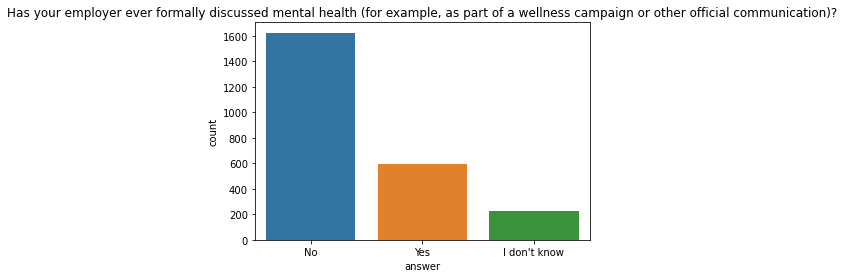

In [72]:
display(mental_health_discussion_employer_formally, 14)

# 1.16 Distribution of employer offering resources to learn more about mental health disorders and options for seeking help

In [73]:
resources_for_mental_health_employer = answers[answers.question_id == 16]

In [74]:
resources_for_mental_health_employer.answer.value_counts()

No              1084
Yes              702
I don't know     668
Name: answer, dtype: int64

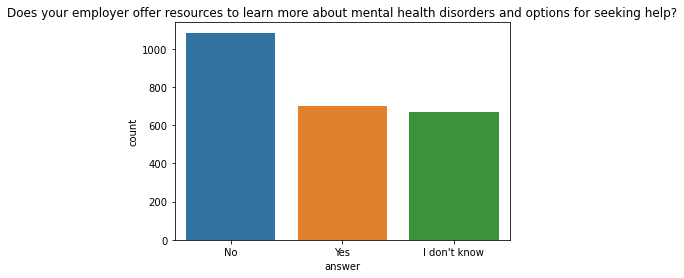

In [75]:
display(resources_for_mental_health_employer, 15)

# 1.17 Distribution of difficultness to leave work due to mental health issue

In [76]:
difficultness_leaving_work = answers[answers.question_id == 17]

In [77]:
difficultness_leaving_work.answer.value_counts()

Somewhat easy                 637
Very easy                     506
I don't know                  379
Somewhat difficult            358
Neither easy nor difficult    344
Very difficult                118
Difficult                     112
Name: answer, dtype: int64

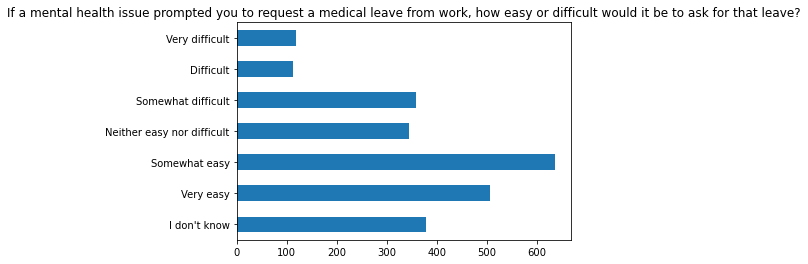

In [78]:
difficultness_leaving_work.answer.value_counts().loc[["I don't know", 'Very easy', 'Somewhat easy', 'Neither easy nor difficult', 'Somewhat difficult', 'Difficult', 'Very difficult']].plot.barh()
plt.title(questions.question[16])
plt.show()

# 1.18 Distribution of comfort of metal helth issue discussion with coworkers

In [79]:
mental_health_discussion_coworkers = answers[answers.question_id == 18]

In [80]:
mental_health_discussion_coworkers.answer.value_counts()

Maybe    1053
No        719
Yes       682
Name: answer, dtype: int64

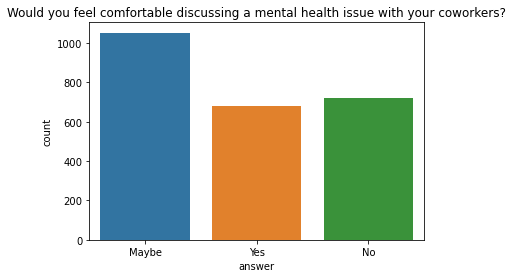

In [81]:
display(mental_health_discussion_coworkers, 17)

# 1.19 Distribution of comfort of metal helth issue discussion with supervisor

In [82]:
mental_health_discussion_supervisor = answers[answers.question_id == 19]

In [83]:
mental_health_discussion_supervisor.answer.value_counts()

Yes      932
Maybe    815
No       707
Name: answer, dtype: int64

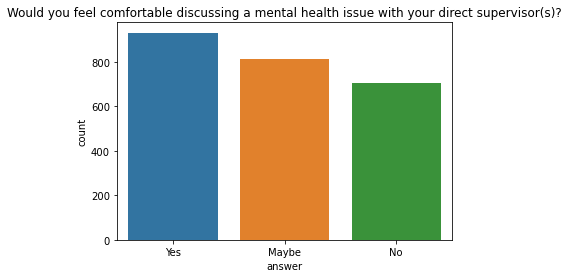

In [84]:
display(mental_health_discussion_supervisor, 18)

# 1.20 Distribution of medical coverage including metal health disorders treatment

In [85]:
medical_treatment = answers[answers.question_id == 20]

In [86]:
medical_treatment.answer.value_counts()

1    337
0    167
Name: answer, dtype: int64

In [87]:
medical_treatment.answer = medical_treatment.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


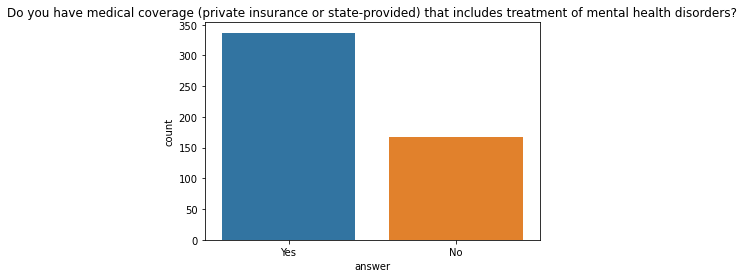

In [88]:
display(medical_treatment, 19)

# 1.21 Distribution of awareness of local or online resources for mental health issues

In [89]:
resources_for_mental_health_lo = answers[answers.question_id == 21]

In [90]:
resources_for_mental_health_lo.answer.value_counts()

I know some             221
Yes, I know several     153
No, I don't know any    130
Name: answer, dtype: int64

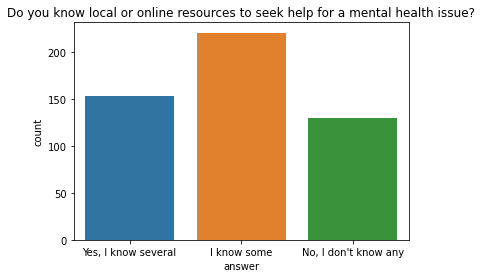

In [91]:
display(resources_for_mental_health_lo, 20)

# 1.22 Distribution of previous employers

In [92]:
previous_employers = answers[answers.question_id == 22]

In [93]:
previous_employers.answer.value_counts()

1    2590
0     368
Name: answer, dtype: int64

In [94]:
previous_employers.answer = previous_employers.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


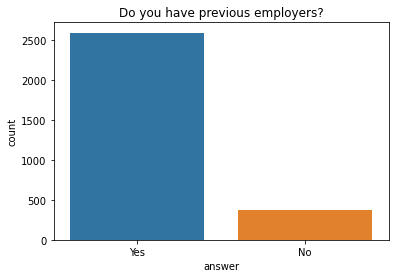

In [95]:
display(previous_employers, 21)

# 1.23 Distribution of previous employers providing mental health benefits

In [96]:
mental_health_benefits_prev = answers[answers.question_id == 23]

In [97]:
mental_health_benefits_prev.answer.value_counts()

Some did             852
No, none did         700
I don't know         619
Yes, they all did    419
Name: answer, dtype: int64

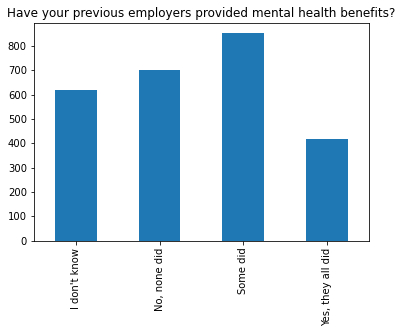

In [98]:
mental_health_benefits_prev.answer.value_counts().loc[["I don't know", 'No, none did', 'Some did', 'Yes, they all did']].plot.bar()
plt.title(questions.question[22])
plt.show()

# 1.24 Distribution of mental health care options of previous empoyers awareness

In [99]:
mental_health_care_options_awareness_prev = answers[answers.question_id == 24]

In [100]:
mental_health_care_options_awareness_prev.answer.value_counts()

I was aware of some                816
N/A (not currently aware)          582
N/A (was not aware)                393
Yes, I was aware of all of them    351
N/A (none offered)                 231
No, I only became aware later      217
Name: answer, dtype: int64

In [101]:
mental_health_care_options_awareness_prev.answer = mental_health_care_options_awareness_prev.answer.replace(['N/A (not currently aware)', 'N/A (was not aware)', 'N/A (none offered)'], ['I am not currently aware', 'I was not aware', 'None offered'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


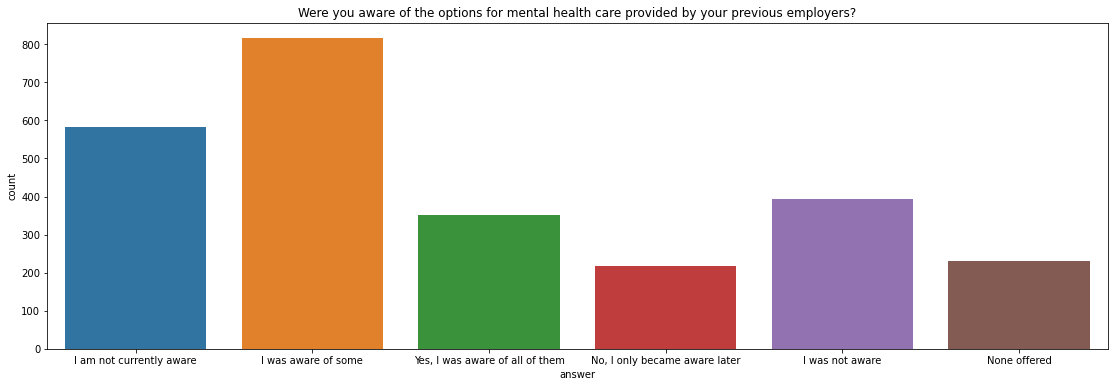

In [102]:
plt.figure(figsize=(19,6))
display(mental_health_care_options_awareness_prev, 23)

# 1.25 Distribution of discussion with previous employers on mental health

In [103]:
mental_health_discussion_employer_formally_prev = answers[answers.question_id == 25]

In [104]:
mental_health_discussion_employer_formally_prev.answer.value_counts()

None did             1794
Some did              559
I don't know          172
Yes, they all did      65
Name: answer, dtype: int64

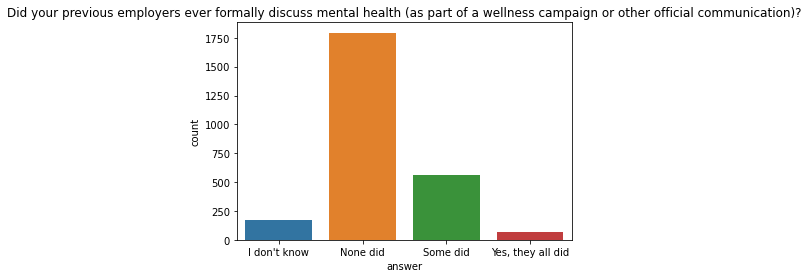

In [105]:
display(mental_health_discussion_employer_formally_prev, 24)

# 1.26 Distribution of previous employers providing resources about mental health disorders

In [106]:
resources_for_mental_health_employer_prev = answers[answers.question_id == 26]

In [107]:
resources_for_mental_health_employer_prev.answer.value_counts()

None did             1714
Some did              754
Yes, they all did     122
Name: answer, dtype: int64

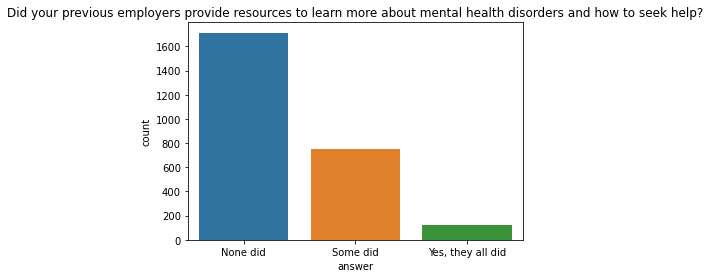

In [108]:
display(resources_for_mental_health_employer_prev, 25)

# 1.27 Distribution of anonymity protection with previous employers

In [109]:
anonymity_protection_prev = answers[answers.question_id == 27]

In [110]:
anonymity_protection_prev.answer.value_counts()

I don't know    1745
Yes, always      401
No               224
Sometimes        220
Name: answer, dtype: int64

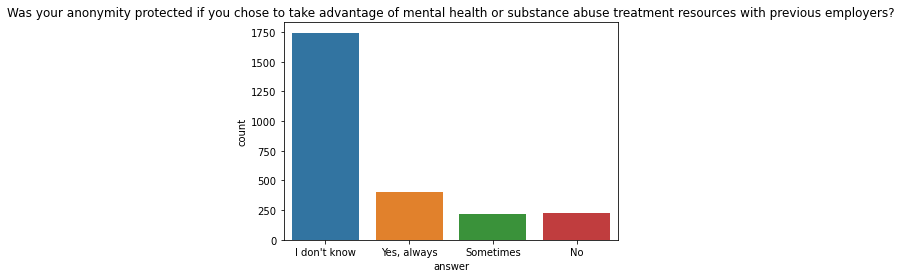

In [111]:
display(anonymity_protection_prev, 26)

# 1.28 Distribution of people willing to discuss your mental health with direct supervisor

In [112]:
willing_to_discuss_prev = answers[answers.question_id == 28]

In [113]:
willing_to_discuss_prev.answer.value_counts()

Some of my previous supervisors         654
Some of my previous employers           654
No, none of my previous supervisors     485
No, at none of my previous employers    416
I don't know                            190
Yes, all of my previous supervisors      98
Yes, at all of my previous employers     93
Name: answer, dtype: int64

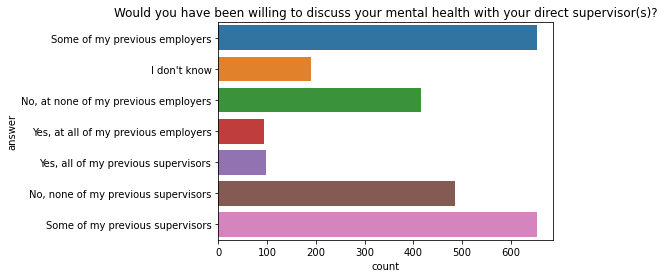

In [114]:
seaborn.countplot(y=willing_to_discuss_prev.answer)
plt.title(questions.question[27])
plt.show()

# 1.29 Distribution of people willing to bring up a physical health issue with a potential employer in an interview

In [115]:
willing_to_discuss_interview = answers[answers.question_id == 29]

In [116]:
willing_to_discuss_interview.answer.value_counts()

Maybe    1265
No        994
Yes       699
Name: answer, dtype: int64

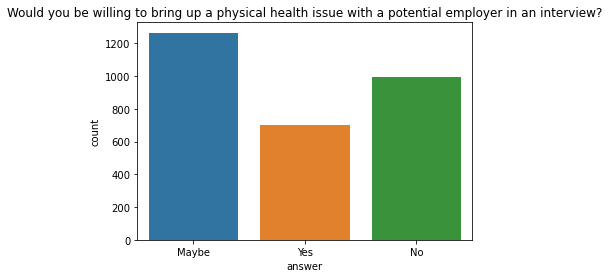

In [117]:
display(willing_to_discuss_interview, 28)

In [118]:
questions.question[29]

'How willing would you be to share with friends and family that you have a mental illness?'

# 1.30 Distribution of people willing to share with friends and family that they have a mental illness

In [119]:
willing_to_discuss_ff = answers[answers.question_id==30]

In [120]:
willing_to_discuss_ff.answer.value_counts()

Very open                                                1104
Somewhat open                                             791
Not open at all                                           332
Neutral                                                   329
Somewhat not open                                         290
Not applicable to me (I do not have a mental illness)     112
Name: answer, dtype: int64

In [121]:
willing_to_discuss_ff.answer = willing_to_discuss_ff.answer.replace('Not applicable to me (I do not have a mental illness)', 'I do not have a mental illness')

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


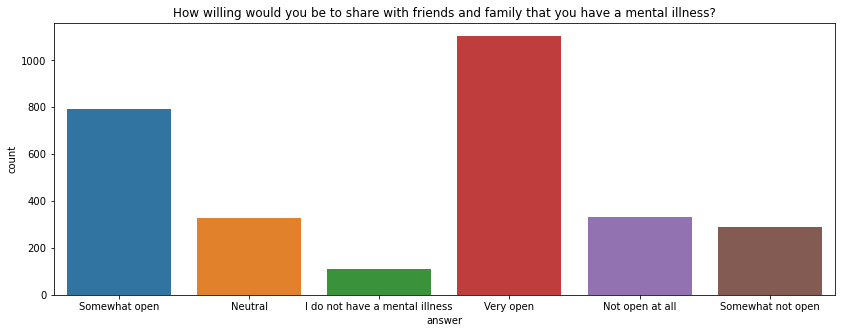

In [122]:
plt.figure(figsize=(14, 5))
display(willing_to_discuss_ff, 29)

# 1.31 Distribution of people less likely to reveal a mental health issue

In [123]:
less_likely_to_discuss = answers[answers.question_id == 31]

In [124]:
less_likely_to_discuss.answer.value_counts()

No       968
Yes      482
Maybe    405
Name: answer, dtype: int64

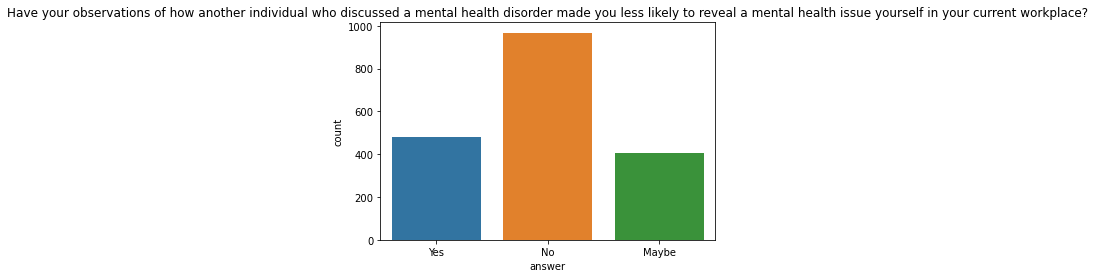

In [125]:
display(less_likely_to_discuss, 30)

# 1.32 Distribution of people who had mental health disorder in the past

In [126]:
mental_health_disorder_past = answers[answers.question_id == 32]

In [127]:
mental_health_disorder_past.answer.value_counts()

Yes           1417
No             896
Possibly       275
Maybe          246
Don't Know     109
Name: answer, dtype: int64

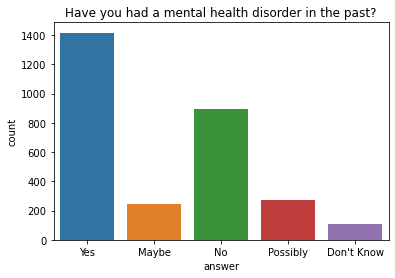

In [128]:
display(mental_health_disorder_past, 31)

# 1.33 Distribution of people who currently have a mental health disorder

In [129]:
mental_health_disorder_curr = answers[answers.question_id == 33]

In [130]:
mental_health_disorder_curr.answer.value_counts()

Yes           1237
No             969
Maybe          327
Possibly       301
Don't Know     124
Name: answer, dtype: int64

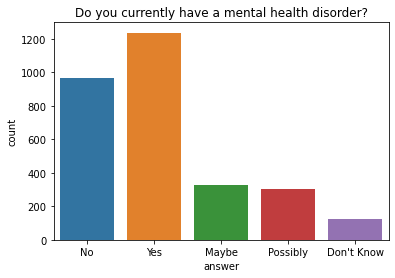

In [131]:
display(mental_health_disorder_curr, 32)

As we can see, there's more people that have mental health disorder than people who doesn't.

# 1.34 Distribution of people diagnosed with a mental health disorder

In [132]:
mental_health_disorder_diagnosed = answers[answers.question_id == 34]

In [133]:
mental_health_disorder_diagnosed.answer.value_counts()

Yes    1363
No      732
Name: answer, dtype: int64

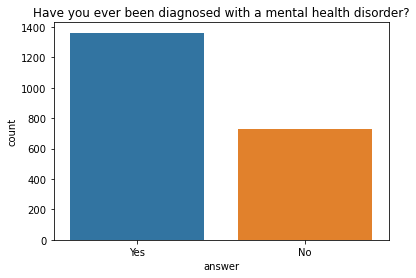

In [134]:
display(mental_health_disorder_diagnosed, 33)

In [135]:
answers[(answers.question_id >= 35) & (answers.question_id <= 47)]

,answer,year,user_id,question_id


In [136]:
gap = 47-35 + 1

# 1.35 Distribution of people who feel that their mental health disorder interferes with their work when being treated effectively

In [137]:
mental_health_disorder_interferes_eff = answers[answers.question_id == 35 + gap]

In [138]:
mental_health_disorder_interferes_eff.answer.value_counts()

Not applicable to me    1119
Sometimes                808
Rarely                   700
Often                    166
Never                    165
Name: answer, dtype: int64

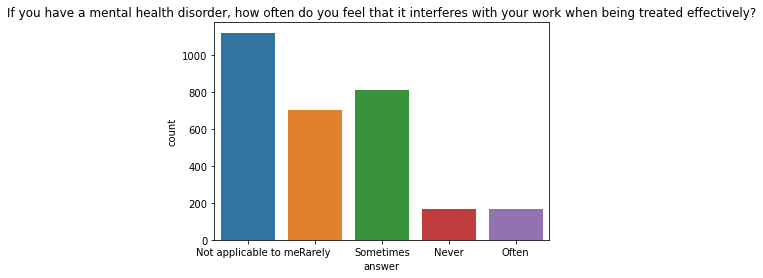

In [139]:
display(mental_health_disorder_interferes_eff, 34)

# 1.36 Distribution of people who feel that their mental health disorder interferes with their work when NOT being treated effectively

In [140]:
mental_health_disorder_interferes_not_eff = answers[answers.question_id == 36 + gap]

In [141]:
mental_health_disorder_interferes_not_eff.answer.value_counts()

Often                   1183
Not applicable to me     966
Sometimes                672
Rarely                   113
Never                     24
Name: answer, dtype: int64

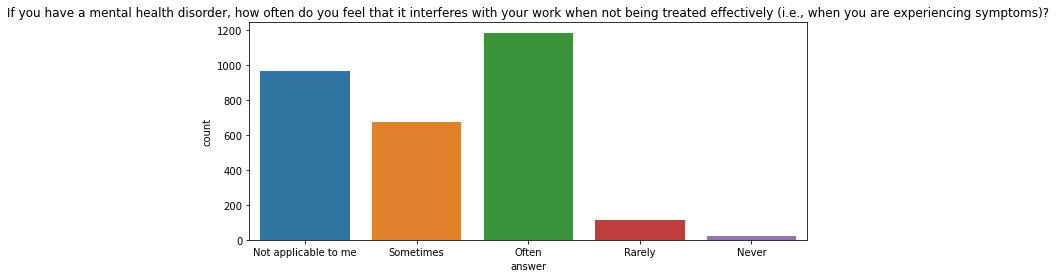

In [142]:
plt.figure(figsize=(10,4))
display(mental_health_disorder_interferes_not_eff, 35)

# 1.37 Distribution of where people work

In [143]:
countries_work = answers[answers.question_id == 37 + gap]

In [144]:
countries_work.answer.value_counts()

United States of America    1872
United Kingdom               300
Canada                       122
Germany                       90
Netherlands                   70
                            ... 
Ghana                          1
Lithuania                      1
Eritrea                        1
Kenya                          1
Singapore                      1
Name: answer, Length: 76, dtype: int64

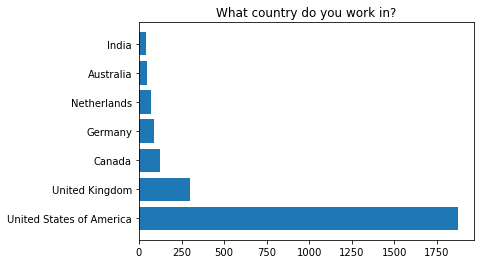

In [145]:
plt.barh(countries_work.answer.value_counts()[:7].index, countries_work.answer.value_counts()[:7])
plt.title(questions.question[36])
plt.show()

# 1.38 Distribution of in which state in the USA people work

In [146]:
states_USA_work = answers[answers.question_id == 38 + gap]

In [147]:
states_USA_work.answer.value_counts()[:7]

California    269
Illinois      197
New York      101
Washington     96
Michigan       84
Minnesota      81
Ohio           78
Name: answer, dtype: int64

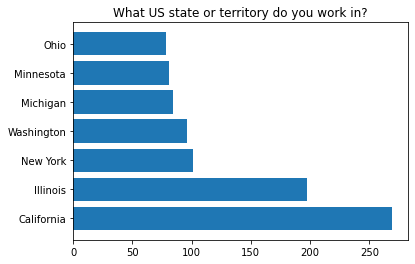

In [148]:
plt.barh(states_USA_work.answer.value_counts()[:7].index, states_USA_work.answer.value_counts()[:7])
plt.title(questions.question[37])
plt.show()

# 1.39 Distribution of people who reveal to have been diagnosed or treated for a mental health disorder to clients or business contacts

In [149]:
mental_health_disorder_reveal_clients = answers[answers.question_id == 39 + gap]

In [150]:
mental_health_disorder_reveal_clients.answer.value_counts()

Not applicable to me                         175
No, because it would impact me negatively    140
Sometimes, if it comes up                    109
No, because it doesn't matter                 73
Yes, always                                    7
Name: answer, dtype: int64

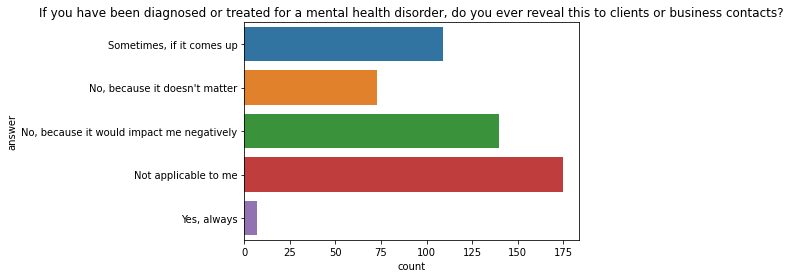

In [151]:
seaborn.countplot(y=mental_health_disorder_reveal_clients.answer)
plt.title(questions.question[38])
plt.show()

In [152]:
questions.question[39]

'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?'

# 1.40 Distribution of people who reveal to have been diagnosed or treated for a mental health disorder to coworkers or employees

In [153]:
mental_health_disorder_reveal_coworkers = answers[answers.question_id == 40 + gap]

In [154]:
mental_health_disorder_reveal_coworkers.answer.value_counts()

Not applicable to me                         186
Sometimes, if it comes up                    179
No, because it would impact me negatively     88
No, because it doesn't matter                 30
Yes, always                                   21
Name: answer, dtype: int64

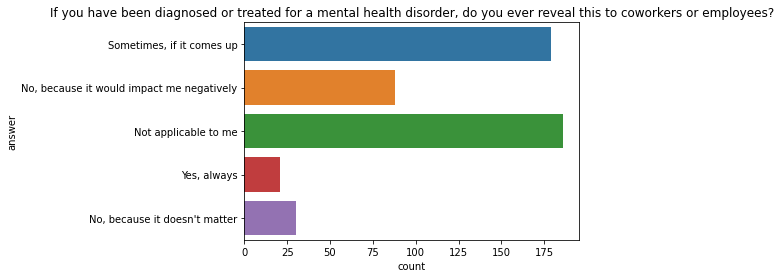

In [155]:
seaborn.countplot(y=mental_health_disorder_reveal_coworkers.answer)
plt.title(questions.question[39])
plt.show()

In [156]:
questions.question[40]

'Do you believe your productivity is ever affected by a mental health issue?'

# 1.41 Distribution of people's productivity affected by metal health issue

In [157]:
productivity = answers[answers.question_id == 41 + gap]

In [158]:
productivity.answer.value_counts()

Yes                     367
Unsure                   60
Not applicable to me     51
No                       26
Name: answer, dtype: int64

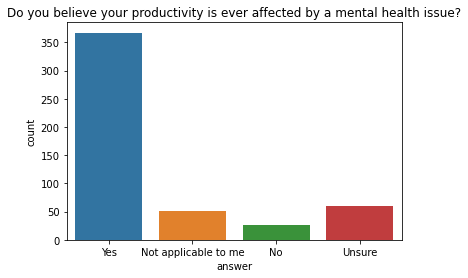

In [159]:
display(productivity, 40)

In [160]:
questions.question[41]

'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'

# 1.42 Distribution of what percentage of work time affected by a mental health issue

In [161]:
work_time_affected = answers[answers.question_id == 42 + gap]

In [162]:
work_time_affected.answer.value_counts()

1-25%      164
26-50%     125
51-75%      53
76-100%     25
Name: answer, dtype: int64

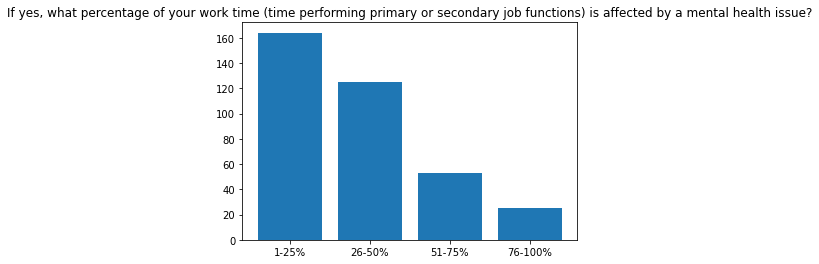

In [163]:
plt.bar(work_time_affected.answer.value_counts().index, work_time_affected.answer.value_counts())
plt.title(questions.question[41])
plt.show()

In [164]:
questions.question[42]

'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'

# 1.43 Distribution of unsupportive or badly handled response to a mental health issue in current or previous workplace

In [165]:
bad_response = answers[answers.question_id == 43 + gap]

In [166]:
bad_response.answer.value_counts()

No                                1207
Maybe/Not sure                     748
Yes, I observed                    541
Yes, I experienced                 356
I've always been self-employed      15
Name: answer, dtype: int64

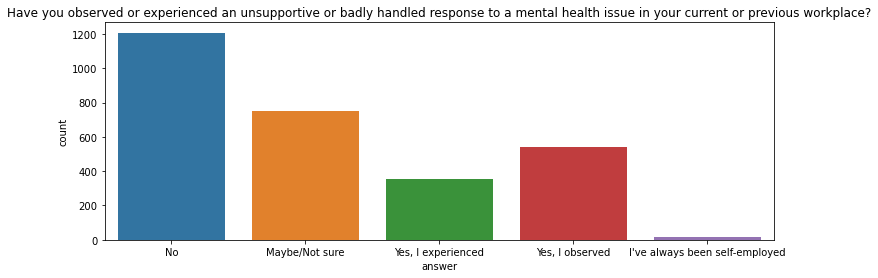

In [167]:
plt.figure(figsize=(12,4))
display(bad_response, 42)

In [168]:
questions.question[43]

'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?'

# 1.44 Distribution of people feeling uncomfortable talking to their coworkers about your physical health or your mental health

In [169]:
uncomfortable_at_talking_coworkers = answers[answers.question_id == 44 + gap]

In [170]:
uncomfortable_at_talking_coworkers.answer.value_counts()

Physical health                   884
Same level of comfort for each    405
Mental health                      19
Name: answer, dtype: int64

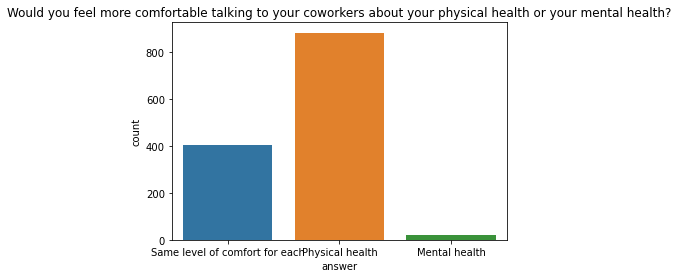

In [171]:
display(uncomfortable_at_talking_coworkers, 43)

In [172]:
questions.question[44]

'Have you ever discussed your mental health with your employer?'

# 1.45 Distribution of people who ever discussed your mental health with their employer

In [173]:
employer_discussion = answers[answers.question_id == 45 + gap]

In [174]:
employer_discussion.answer.value_counts()

0    886
1    422
Name: answer, dtype: int64

In [175]:
employer_discussion.answer = employer_discussion.answer.replace(["1", "0"], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


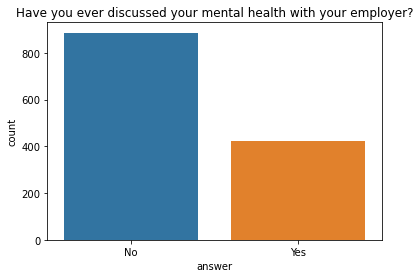

In [176]:
display(employer_discussion, 44)

In [177]:
questions.question[45]

'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.'

# 1.46 Conversations about metal health issues with employers

In [178]:
conversations_employer = answers[answers.question_id == 46 + gap]

In [179]:
conversations_employer.answer

148463    The conversation went well, he too suffers men...
148464    Direct Manager and HR know because of medicati...
148471    I needed to discuss accommodations due to Auti...
148473                                    Are you OK?\nYeup
148475    "I suffer from extreme anxiety and ADD, and ta...
                                ...                        
219757    Was having a very hard time with burnout/emoti...
219760    I am cofounder. I discussed my clinical OCD wi...
219763    i have severe ADHD, and it's important to disc...
219771    Mentioned diagnosis for depression, not dismis...
219780    My current manager will be retiring in the nex...
Name: answer, Length: 352, dtype: object

In [180]:
questions.question[46]

'Have you ever discussed your mental health with coworkers?'

# 1.47 Distribution of people who ever discussed your mental health with their coworkers

In [181]:
coworker_discussion = answers[answers.question_id == 47 + gap]

In [182]:
coworker_discussion.answer.value_counts()

0    723
1    581
Name: answer, dtype: int64

In [183]:
coworker_discussion.answer = coworker_discussion.answer.replace(['0', '1'], ['No', 'Yes'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


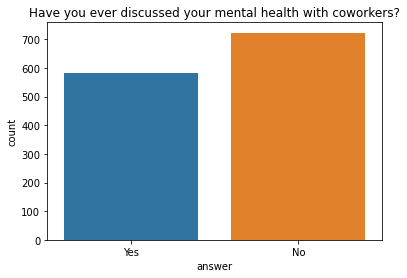

In [184]:
display(coworker_discussion, 46)

In [185]:
questions.question[47]

'Describe the conversation with coworkers you had about your mental health including their reactions.'

# 1.48 Conversations about metal health issues with coworkers

In [186]:
conversations_coworkers = answers[answers.question_id == 48 + gap]

In [187]:
conversations_coworkers

,answer,year,user_id,question_id
149973,Spoke about my anxiety they were very supportive,2017,2694,61
149974,"the coworker was comprehensive, empathetic and...",2017,2695,61
149975,They all seemed understanding and some even ad...,2017,2696,61
149976,Coworkers that have become friends with me are...,2017,2697,61
149979,I've talked about my depression with coworkers...,2017,2700,61
...,...,...,...,...
220470,It was about anxiety and depression and pretty...,2019,4204,61
220471,We thought that mental health issues were priv...,2019,4205,61
220473,General discussion about being in low spirits,2019,4207,61
220475,"Had to take day off recently, no will to get o...",2019,4209,61


In [188]:
questions.question[48]

"Have you ever had a coworker discuss their or another coworker's mental health with you?"

# 1.49 Distribution of people's coworkers discuss their or another coworker's mental health with them

In [189]:
other_people_discuss = answers[answers.question_id == 49 + gap]

In [190]:
other_people_discuss.answer.value_counts()

0    674
1    628
Name: answer, dtype: int64

In [191]:
other_people_discuss.answer = other_people_discuss.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


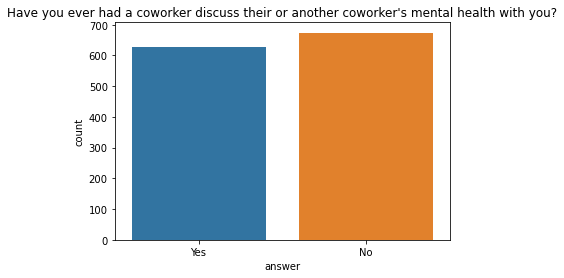

In [192]:
display(other_people_discuss, 48)

In [193]:
questions.question[49]

'Describe the conversation your coworker had with you about their mental health (please do not use names).'

# 1.50 Conversatoions with coworkers about others' mental health

In [194]:
conversations_other_people = answers[answers.question_id == 50 + gap]

In [195]:
conversations_other_people

,answer,year,user_id,question_id
151485,"they spoke about their depression, i offered m...",2017,2694,63
151486,"a discussion about symptoms of depression, and...",2017,2695,63
151491,A colleague was experiencing extreme anxiety a...,2017,2700,63
151492,One of my coworkers took a month off due to bu...,2017,2701,63
151495,"When I disclosed to a co-worker my diagnosis, ...",2017,2704,63
...,...,...,...,...
221173,One co-worker had a colleague that they could ...,2019,4203,63
221174,They talked about their anxiety,2019,4204,63
221175,The person had a kind of mental illness.,2019,4205,63
221176,"Stress at work / anxiety, leading to need for ...",2019,4206,63


In [196]:
questions.question[50]

'Overall, how much importance does your employer place on physical health?'

# 1.51 Distribution of how much importance do employers place on physical health

In [197]:
importance_ph = answers[answers.question_id == 51 + gap]

In [198]:
importance_ph.answer.value_counts()

7     269
5     257
8     221
6     166
10     96
9      87
3      67
4      51
2      43
0      34
1      17
Name: answer, dtype: int64

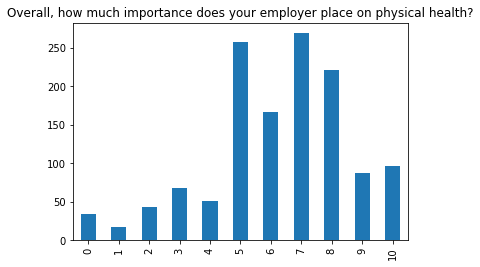

In [199]:
importance_ph.answer.value_counts().loc[[str(i) for i in range(11)]].plot.bar()
plt.title(questions.question[50])
plt.show()

In [200]:
questions.question[51]

'Overall, how much importance does your employer place on mental health?'

# 1.52 Distribution of how much importance do employers place on mental health

In [201]:
importance_mh = answers[answers.question_id == 52 + gap]

In [202]:
importance_mh.answer.value_counts()

5     312
7     179
3     136
6     133
8     133
4     104
2      95
0      87
1      48
10     41
9      40
Name: answer, dtype: int64

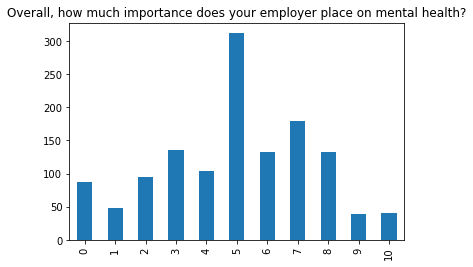

In [203]:
importance_mh.answer.value_counts().loc[[str(i) for i in range(11)]].plot.bar()
plt.title(questions.question[51])
plt.show()

In [204]:
questions.question[52]

'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?'

# 1.53 Distribution of affected people, who revealed their metal health disorder to clients

In [205]:
mental_health_disorder_reveal_clients_affected = answers[answers.question_id == 53 + gap]

In [206]:
mental_health_disorder_reveal_clients_affected.answer.value_counts()

I'm not sure    35
Negatively      24
No change       20
Positively      13
Name: answer, dtype: int64

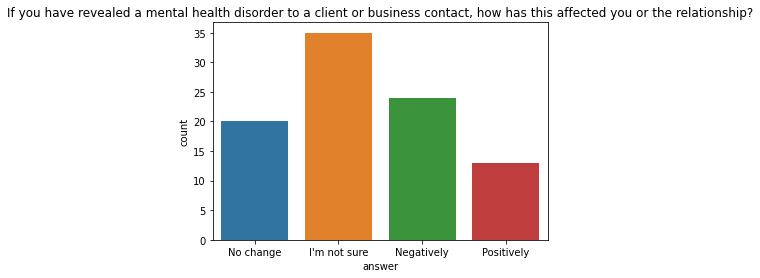

In [207]:
display(mental_health_disorder_reveal_clients_affected, 52)

In [208]:
questions.question[53]

'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?'

# 1.54 Distribution of affected people, who revealed their metal health disorder to clients

In [209]:
mental_health_disorder_reveal_coworkers_affected = answers[answers.question_id == 54 + gap]

In [210]:
mental_health_disorder_reveal_coworkers_affected.answer.value_counts()

Not applicable to me    103
I'm not sure             45
Positively               28
No change                25
Negatively               16
Name: answer, dtype: int64

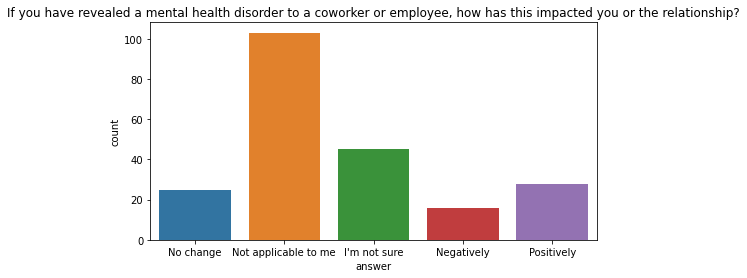

In [211]:
plt.figure(figsize=(8, 4))
display(mental_health_disorder_reveal_coworkers_affected, 53)

In [212]:
questions.question[54]

'Was your employer primarily a tech company/organization?'

# 1.55 Distribution of previous tech companies

In [213]:
tech_companies_prev = answers[answers.question_id == 55 + gap]

In [214]:
tech_companies_prev.answer.value_counts()

1    901
0    425
Name: answer, dtype: int64

In [215]:
tech_companies_prev.answer = tech_companies_prev.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


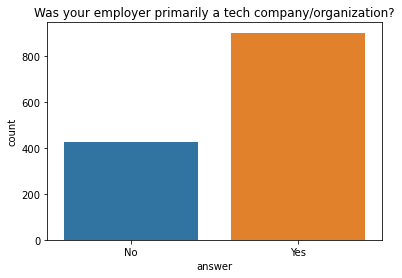

In [216]:
display(tech_companies_prev, 54)

In [217]:
questions.question[55]

'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'

# 1.56 Distribution of people who have felt more comfortable talking to previous employer about physical health or your mental health

In [218]:
comfortable_prev_employer = answers[answers.question_id == 56 + gap]

In [219]:
comfortable_prev_employer.answer.value_counts()

Physical health                   987
Same level of comfort for each    324
Mental health                      15
Name: answer, dtype: int64

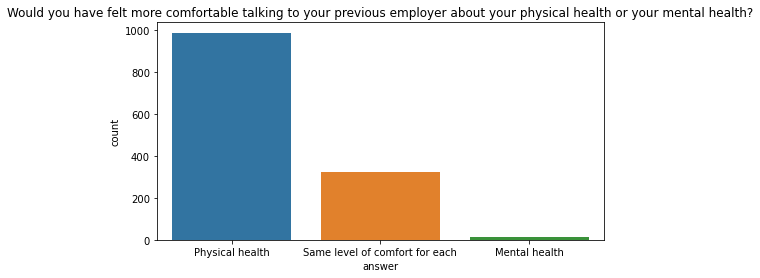

In [220]:
plt.figure(figsize=(8, 4))
display(comfortable_prev_employer, 55)

In [221]:
questions.question[56]

'Did you ever discuss your mental health with your previous employer?'

# 1.57 Distribution of people who unformally discussed mental health with previous employer

In [222]:
mental_health_discussion_employer_prev = answers[answers.question_id == 57 + gap]

In [223]:
mental_health_discussion_employer_prev.answer.value_counts()

0    1025
1     301
Name: answer, dtype: int64

In [224]:
mental_health_discussion_employer_prev.answer = mental_health_discussion_employer_prev.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


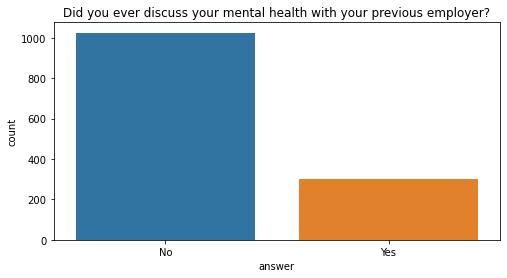

In [225]:
plt.figure(figsize=(8, 4))
display(mental_health_discussion_employer_prev, 56)

In [226]:
questions.question[57]

'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.'

# 1.58 Conversations with previous employers

In [227]:
conversations_employer_prev = answers[answers.question_id == 58 + gap]

In [228]:
conversations_employer_prev.answer

157539    I've mentioned ADHD and anxiety before but in ...
157542                                             Oklahoma
157549                         some employee need treatment
157562    The conversation I’m referring to was very two...
157569    I went to my direct manager to get consistent ...
                                ...                        
223977                                              anxiety
223978                 anxiety issues, perfectionism issues
223979    Felt burned out and not sure what to do. Asked...
223987    my previous employer was not supportive at all...
223990                                            No thanks
Name: answer, Length: 228, dtype: object

In [229]:
questions.question[58]

'Did you ever discuss your mental health with a previous coworker(s)?'

 # 1.59 Distribution of people who ever discussed mental health with previous coworkers

In [230]:
mental_health_discussion_coworkers_prev = answers[answers.question_id == 59 + gap]

In [231]:
mental_health_discussion_coworkers_prev.answer.value_counts()

0    854
1    468
Name: answer, dtype: int64

In [232]:
mental_health_discussion_coworkers_prev.answer = mental_health_discussion_coworkers_prev.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


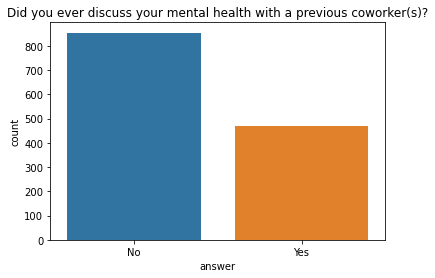

In [233]:
display(mental_health_discussion_coworkers_prev, 58)

In [234]:
questions.question[59]

'Describe the conversation you had with your previous coworkers about your mental health including their reactions.'

# 1.60 Conversations with previous coworkers

In [235]:
conversations_coworkers_prev = answers[answers.question_id == 60 + gap]

In [236]:
conversations_coworkers_prev.answer

159046                         understanding and supportive
159047    The ones that I discussed it with were actuall...
159049       I'm in mental heatlh so I talk about it often.
159051    I've had conversations about depression with c...
159054                                             Oklahoma
                                ...                        
224691    i only discussed my ADHD with co-workers i tru...
224694    It was around anxiety and depression and it wa...
224695        We discussed a person who had mental illness.
224700    It empowered others to open up. Stigma was app...
224708    This was in a residential youth camp, and it w...
Name: answer, Length: 306, dtype: object

In [237]:
questions.question[60]

"Did you ever have a previous coworker discuss their or another coworker's mental health with you?"

# 1.61 Distribution of people who ever had a previous coworker discuss others' people mental health

In [238]:
other_people_discuss_prev = answers[answers.question_id == 61 + gap]

In [239]:
other_people_discuss_prev.answer.value_counts()

0    881
1    438
Name: answer, dtype: int64

In [240]:
other_people_discuss_prev.answer = other_people_discuss_prev.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


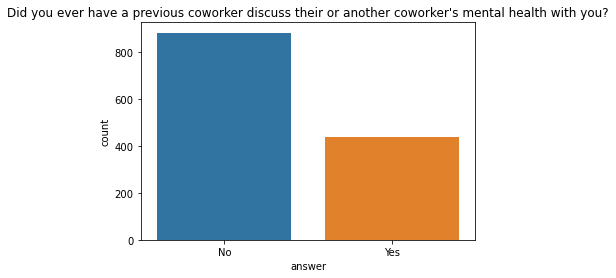

In [241]:
display(other_people_discuss_prev, 60)

In [242]:
questions.question[61]

'Describe the conversation your coworker had with you about their mental health (please do not use names)..1'

# 1.62 Conversations with previous coworkers about other people

In [243]:
conversations_other_people_prev = answers[answers.question_id == 62 + gap]

In [244]:
conversations_other_people_prev.answer

160561    They talked about as caregivers of family member.
160563    We were very concerned about her, it was affec...
160564    A co-worker discussed their addiction with me,...
160573                                       need treatment
160586         Very uncomfortable, unfair and mean-spirited
                                ...                        
225373               Depressed and stressed. Anxious a lot.
225375    General conversations about anxiety, depressio...
225377    Coworkers have come to me to vent/talk-through...
225380    They would speak about Asperger's or depressio...
225386    Same, with people who turned into friends and ...
Name: answer, Length: 270, dtype: object

In [245]:
questions.question[62]

'Overall, how much importance did your previous employer place on physical health?'

# 1.63 Distribution of importance on physical health by previous employer

In [246]:
importance_ph_prev = answers[answers.question_id == 63 + gap]

In [247]:
importance_ph_prev.answer.value_counts()

5     328
7     204
8     161
6     155
0      98
3      87
4      81
10     64
2      62
9      54
1      32
Name: answer, dtype: int64

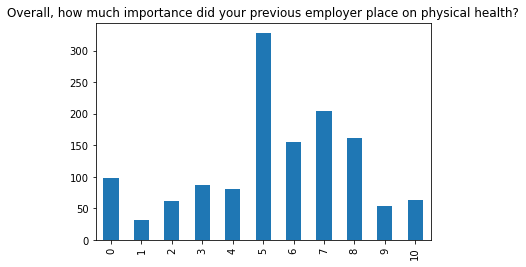

In [248]:
importance_ph_prev.answer.value_counts().loc[[str(i) for i in range(11)]].plot.bar()
plt.title(questions.question[62])
plt.show()

In [249]:
questions.question[63]

'Overall, how much importance did your previous employer place on mental health?'

# 1.64 Distribution of importance on mental health by previous employer

In [250]:
importance_mh_prev = answers[answers.question_id == 64 +gap]

In [251]:
importance_mh_prev.answer.value_counts()

5     272
0     247
3     170
2     164
4     124
6      98
1      94
7      81
8      47
10     16
9      13
Name: answer, dtype: int64

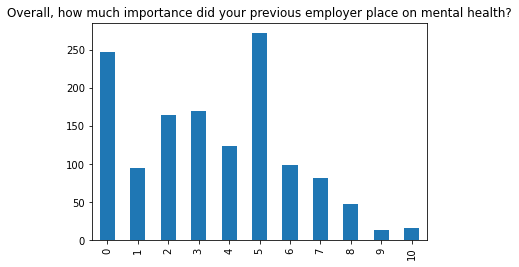

In [252]:
importance_mh_prev.answer.value_counts().loc[[str(i) for i in range(11)]].plot.bar()
plt.title(questions.question[63])
plt.show()

In [253]:
questions.question[64]

'Are you openly identified at work as a person with a mental health issue?'

# 1.65 Distribution of people identified at work as a person with a mental health issue

In [254]:
identified_ill = answers[answers.question_id == 65 + gap]

In [255]:
identified_ill.answer.value_counts()

0    1340
1     183
Name: answer, dtype: int64

In [256]:
identified_ill.answer = identified_ill.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


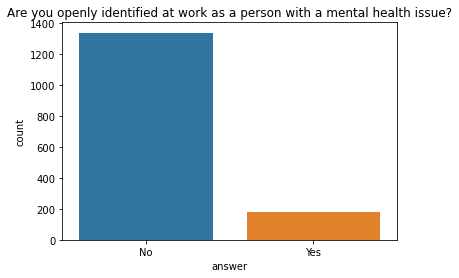

In [257]:
display(identified_ill, 64)

In [258]:
questions.question[65]

'Has being identified as a person with a mental health issue affected your career?'

# 1.66 Distribution of people being identified as a person with a mental health issue affected their careers

In [259]:
identified_ill_affected = answers[answers.question_id == 66 + gap]

In [260]:
identified_ill_affected.answer.value_counts()

0    119
1     61
Name: answer, dtype: int64

In [261]:
identified_ill_affected.answer = identified_ill_affected.answer.replace(['1', '0'], ['Yes', 'No'])

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


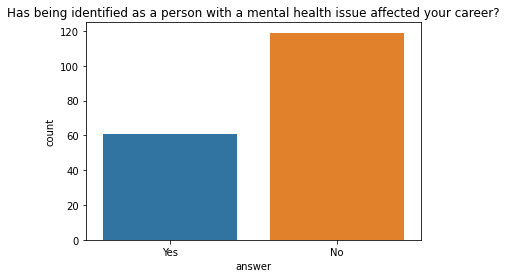

In [262]:
display(identified_ill_affected, 65)

In [263]:
questions.question[66]

'How has it affected your career?'

# 1.67 Distribution of the rate of how it affected their careers

In [264]:
identified_ill_affected_rate = answers[answers.question_id == 67 + gap]

In [265]:
identified_ill_affected_rate.answer.value_counts()

3     15
4     13
2      9
6      5
8      4
7      4
1      4
0      3
10     2
5      1
Name: answer, dtype: int64

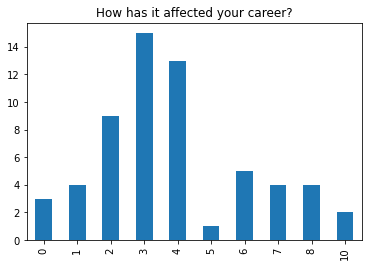

In [266]:
identified_ill_affected_rate.answer.value_counts().loc[[str(i) for i in range(11) if i != 9]].plot.bar()
plt.title(questions.question[66])
plt.show()

In [267]:
questions.question[67]

'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?'

# 1.68 Rate of reaction of team members/co-workers if they knew a person suffered from a mental health disorder

In [268]:
identified_ill_affected_react_rate = answers[answers.question_id == 68 + gap]

In [269]:
identified_ill_affected_react_rate.answer.value_counts()

5     406
6     192
7     190
4     182
3     153
8     146
10     67
2      67
9      46
0      45
1      29
Name: answer, dtype: int64

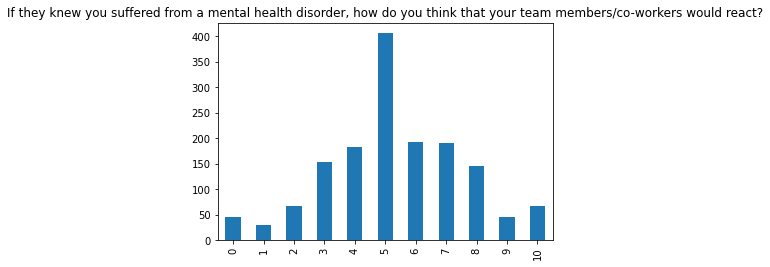

In [270]:
identified_ill_affected_react_rate.answer.value_counts().loc[[str(i) for i in range(11)]].plot.bar()
plt.title(questions.question[67])
plt.show()

In [271]:
questions.question[68]

'Describe the circumstances of the badly handled or unsupportive response.'

# 1.69 Circumastances of badly handled or unsupportive response

In [272]:
bad_response_circumstances = answers[answers.question_id == 69 + gap]

In [273]:
bad_response_circumstances.answer

165850    During a discussion about "mental health first...
165851    I was suffering depression and I was open abou...
165858                                             Oklahoma
165859                         Was told it does not matter.
165860    Several times I've seen people with depression...
                                ...                        
227852    I have personally witnessed the CTO of a multi...
227859    my manager at my previous job scoffed at my ad...
227862                                            No thanks
227868    Had someone tell me I needed to quit taking me...
227873    employee was ostracized and employer discussed...
Name: answer, Length: 336, dtype: object

In [274]:
questions.question[69]

'Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?'

# 1.70 Distribution of people who observed or experienced supportive or well handled response to a mental health issue in their current or previous workplace

In [275]:
supportive_response = answers[answers.question_id == 70 + gap]

In [276]:
supportive_response.answer.value_counts()

No                                541
Maybe/Not sure                    392
Yes, I experienced                300
Yes, I observed                   278
I've always been self-employed     12
Name: answer, dtype: int64

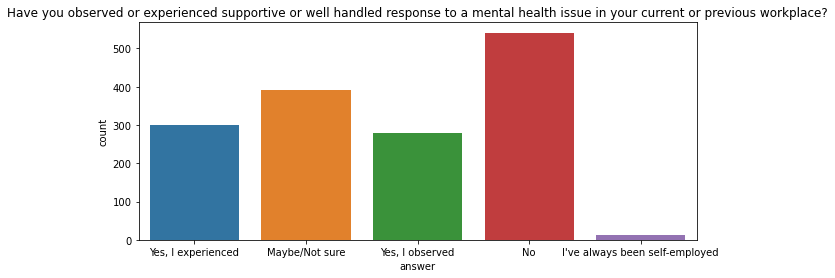

In [277]:
plt.figure(figsize=(10, 4))
display(supportive_response, 69)

In [278]:
questions.question[70]

'Describe the circumstances of the supportive or well handled response.'

# 1.71 Circumstances of supportive or well handled response

In [279]:
supportive_response_circumstances = answers[answers.question_id == 71 + gap]

In [280]:
supportive_response_circumstances.answer

Series([], Name: answer, dtype: object)

In [281]:
questions.question[71]

'Overall, how well do you think the tech industry supports employees with mental health issues?'

# 1.72 Rate of tech industry support for employees with mental health issues

In [282]:
tech_industry_support = answers[answers.question_id == 72 + gap]

In [283]:
tech_industry_support.answer.value_counts()

3    597
2    494
1    217
4    191
5     24
Name: answer, dtype: int64

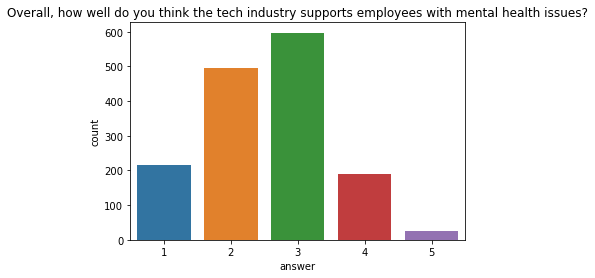

In [284]:
display(tech_industry_support, 71)

In [285]:
questions.question[72]

'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.'

# 1.73 Descriptions of what people think about the industry as a whole and/or employers could do to improve mental health support for employees

In [286]:
tech_industry_imporove = answers[answers.question_id == 73 + gap]

In [287]:
tech_industry_imporove.answer

168873                         They don't take it seriously
168874    raise awareness, talk about it to lessen the s...
168875    Education and awareness, statistics, add suppo...
168876         More support, less burnout and death marches
168877    I think tech is more internal and they don't r...
                                ...                        
229279    Supervisors should try and break the ice with ...
229281                                                  IDK
229282                                         sdsdsdsdsdsd
229283                                      raise awareness
229284    reduce stigma. offer options for part time wor...
Name: answer, Length: 1042, dtype: object

In [288]:
questions.question[73]

'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.'

# 1.74 Survey question #1

In [289]:
answers[answers.question_id == 74 + gap]

,answer,year,user_id,question_id
169633,nope,2017,2698,87
169638,Oklahoma,2017,2703,87
169640,People with mental disorders can be just as pr...,2017,2705,87
169643,Nope,2017,2708,87
169645,no,2017,2710,87
...,...,...,...,...
229624,no,2019,4206,87
229631,reasons for mental health issues should be cov...,2019,4213,87
229634,sdsdsdsdsdsd,2019,4216,87
229635,no,2019,4217,87


This will be skipped, because it is some kind of feedback to those who cunducted the survey and it is not useful for the purpuse of the project

In [290]:
questions.question[74]

'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)'

# 1.75 Survey question #2

In [291]:
answers[answers.question_id == 75 + gap]

,answer,year,user_id,question_id
170385,0,2017,2694,88
170386,0,2017,2695,88
170387,1,2017,2696,88
170388,0,2017,2697,88
170389,1,2017,2698,88
...,...,...,...,...
229984,0,2019,4214,88
229985,0,2019,4215,88
229986,0,2019,4216,88
229987,0,2019,4217,88


This will be skipped, because it is some kind of feedback to those who cunducted the survey and it is not useful for the purpuse of the project

In [292]:
questions.question[75]

'What is your race?'

# 1.76 Distribution of races

In [293]:
races = answers[answers.question_id == 76 + gap]

In [294]:
races.answer.value_counts()

White                               873
More than one of the above           35
Asian                                31
I prefer not to answer               29
Black or African American            15
Hispanic                              1
Caucasian                             1
European American                     1
American Indian or Alaska Native      1
White Hispanic                        1
Name: answer, dtype: int64

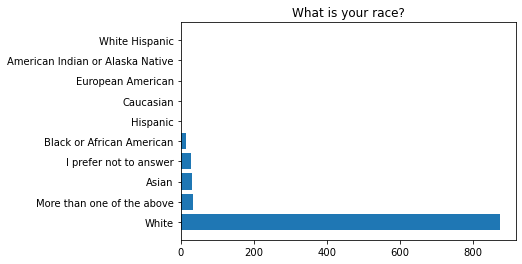

In [295]:
plt.barh(races.answer.value_counts().index, races.answer.value_counts())
plt.title(questions.question[75])
plt.show()

In [296]:
questions.question[76]

'Do you think that discussing a physical health issue with your employer would have negative consequences?'

# 1.77 Distribution of people who think that discussing a physical health issue with their employer would have negative consequences

In [297]:
ph_discussion_employer_negative = answers[answers.question_id == 77 + gap]

In [298]:
ph_discussion_employer_negative.answer.value_counts()

No       1763
Maybe     541
Yes       102
Name: answer, dtype: int64

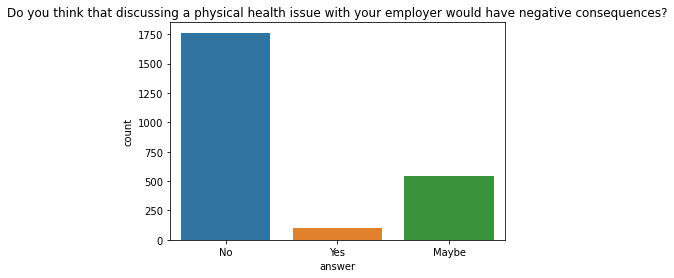

In [299]:
display(ph_discussion_employer_negative, 76)

In [300]:
questions.question[77]

'Do you feel that your employer takes mental health as seriously as physical health?'

# 1.78 Does employers take mental health as seriously as physical health

In [301]:
mh_as_ph = answers[answers.question_id == 78 + gap]

In [302]:
mh_as_ph.answer.value_counts()

Yes             693
No              644
Don't know      576
I don't know    493
Name: answer, dtype: int64

In [303]:
mh_as_ph.answer = mh_as_ph.answer.replace("Don't know", "I don't know")

C:\Users\admid\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


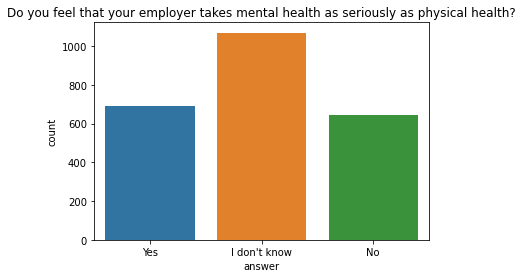

In [304]:
display(mh_as_ph, 77)

In [305]:
questions.question[78]

'If you have a mental health condition, do you feel that it interferes with your work?'

# 1.79 Distribution of people who feel that their metal health condition inteferes with their work

In [306]:
mental_health_disorder_interferes = answers[answers.question_id == 79 + gap]

In [307]:
mental_health_disorder_interferes.answer.value_counts()

Sometimes    466
Never        213
Rarely       173
Often        144
Name: answer, dtype: int64

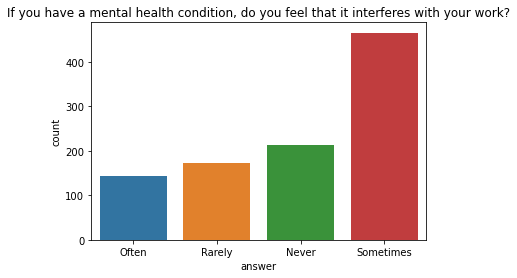

In [308]:
display(mental_health_disorder_interferes, 78)

In [309]:
questions.question[79]

'Do you work remotely (outside of an office) at least 50% of the time?'

# 1.80 Distribution of people who work remotely at least 50% of the time

In [310]:
work_time_remotely_50 = answers[answers.question_id == 80 + gap]

In [311]:
work_time_remotely_50.answer.value_counts()

No     884
Yes    376
Name: answer, dtype: int64

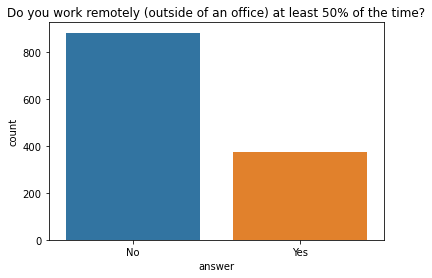

In [312]:
display(work_time_remotely_50, 79)

In [313]:
questions.question[80]

'Do you know the options for mental health care your employer provides?'

# 1.81 Distribution of knowledge for options for mental health care that employers provide

In [314]:
options_awareness = answers[answers.question_id == 81 + gap]

In [315]:
options_awareness.answer.value_counts()

No          502
Yes         444
Not sure    314
Name: answer, dtype: int64

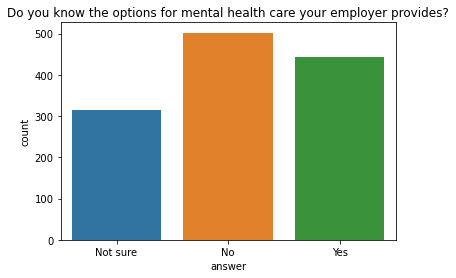

In [316]:
display(options_awareness, 80)

In [317]:
questions.question[81]

'Has your employer ever discussed mental health as part of an employee wellness program?'

# 1.82 Distribution of discussions about employee wellness program including mental health

In [318]:
employee_wellness = answers[answers.question_id == 82 + gap]

In [319]:
employee_wellness.answer.value_counts()

No            843
Yes           229
Don't know    188
Name: answer, dtype: int64

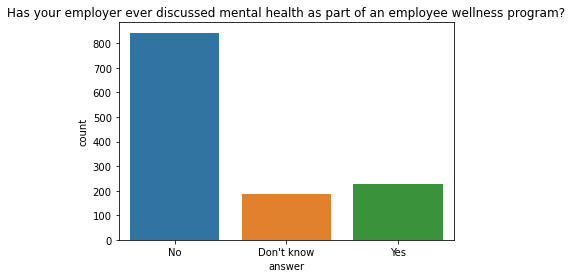

In [320]:
display(employee_wellness, 81)

In [321]:
questions.question[82]

'Does your employer provide resources to learn more about mental health issues and how to seek help?'

# 1.83 Distribution of employers who provide resources about mental health issue

In [322]:
employer_resources = answers[answers.question_id == 83 + gap]

In [323]:
employer_resources.answer.value_counts()

No            647
Don't know    363
Yes           250
Name: answer, dtype: int64

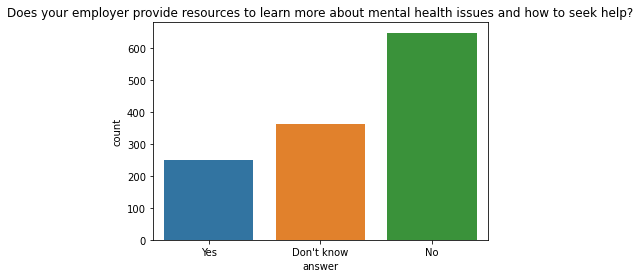

In [324]:
display(employer_resources, 82)

In [325]:
questions.question[83]

'How easy is it for you to take medical leave for a mental health condition?'

# 1.84 Distribution of difficultness leaving work for a mental health condition

In [326]:
leave_work = answers[answers.question_id == 84 + gap]

In [327]:
leave_work.answer.value_counts()

Don't know            564
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: answer, dtype: int64

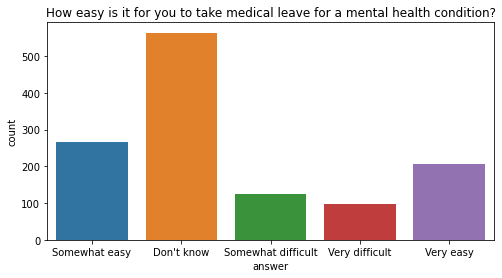

In [328]:
plt.figure(figsize=(8, 4))
display(leave_work, 83)

In [329]:
questions.question[84]

'Do you think that discussing a mental health issue with your employer would have negative consequences?'

# 1.85 Distribution of people who think that discussing a mental health issue with their employer would have negative consequences

In [330]:
mh_discussion_employer_negative = answers[answers.question_id == 85 + gap]

In [331]:
mh_discussion_employer_negative.answer.value_counts()

No       490
Maybe    477
Yes      293
Name: answer, dtype: int64

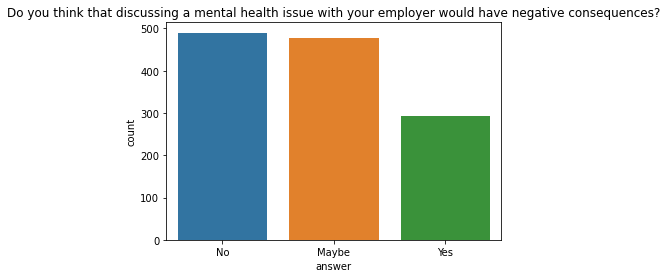

In [332]:
display(mh_discussion_employer_negative, 84)

In [333]:
questions.question[85]

'Would you be willing to discuss a mental health issue with your coworkers?'

# 1.86 Distribution of people who would be willing to discuss mental health issue with coworkers

In [334]:
mental_health_discussion_coworkers_willing = answers[answers.question_id == 86 + gap]

In [335]:
mental_health_discussion_coworkers_willing.answer.value_counts()

Some of them    775
No              260
Yes             225
Name: answer, dtype: int64

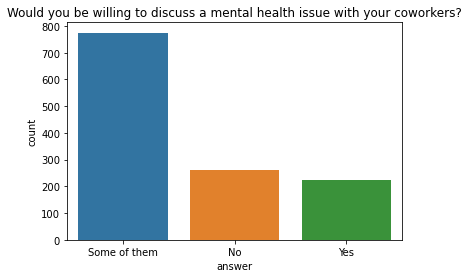

In [336]:
display(mental_health_discussion_coworkers_willing, 85)

In [337]:
questions.question[86]

'Would you be willing to discuss a mental health issue with your direct supervisor(s)?'

# 1.87 Distribution of people who would be willing to discuss mental health issue with supervisor

In [338]:
mental_health_discussion_supervisor_willing = answers[answers.question_id == 87 + gap]

In [339]:
mental_health_discussion_supervisor_willing.answer.value_counts()

Yes             516
No              394
Some of them    350
Name: answer, dtype: int64

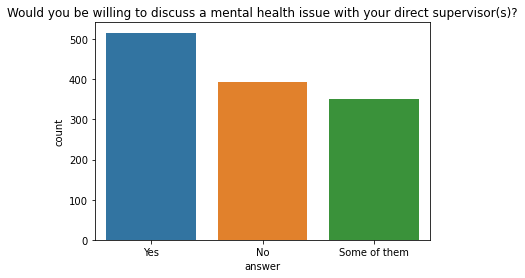

In [340]:
display(mental_health_discussion_supervisor_willing, 86)

In [341]:
questions.question[87]

'Would you bring up a physical health issue with a potential employer in an interview?'

# 1.88 Distribution of people who would bring up physical health issue to potential employer on interview

In [342]:
ph_issue_potential_employer = answers[answers.question_id == 88 + gap]

In [343]:
ph_issue_potential_employer.answer.value_counts()

Maybe    558
No       500
Yes      202
Name: answer, dtype: int64

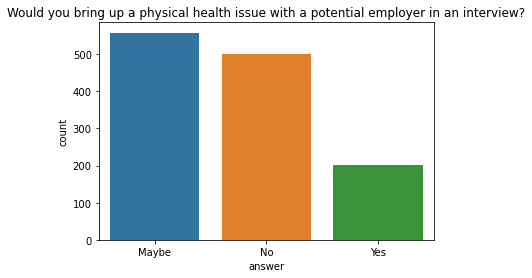

In [344]:
display(ph_issue_potential_employer, 87)

In [345]:
questions.question[88]

'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?'

# 1.89 Distribution of negative consequences for coworkers with mental health conditions

In [346]:
coworkers_mh_negative = answers[answers.question_id == 89 + gap]

In [347]:
coworkers_mh_negative.answer.value_counts()

No     1075
Yes     185
Name: answer, dtype: int64

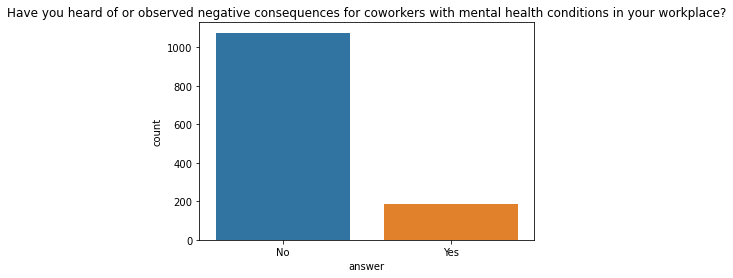

In [348]:
display(coworkers_mh_negative, 88)

In [349]:
questions.question[89]

'Any additional notes or comments'

# 1.90 Additional notes and comments

In [350]:
notes_and_comments = answers[answers.question_id == 90 + gap]

In [351]:
notes_and_comments.answer

31513    I'm not on my company's health insurance, whic...
31515    I have chronic, low-level neurological issues ...
31516    My company does provide healthcare, but not to...
31524                  Relatively new job. Ask again later
31525    Sometimes I think  about using drugs for my me...
                               ...                        
32723    Although my employer does everything they can ...
32732    I work at a large university with a track reco...
32734    i'm in a country with social health care, so m...
32745    In australia, all organisations of a certain s...
32749                                     Bipolar disorder
Name: answer, Length: 163, dtype: object

In [352]:
questions.question[90]

'Do you think that discussing a mental health disorder with your employer would have negative consequences?'

# 1.91 Distribution of people who think that discussing a mental health disorder with their employer would have negative consequences

In [353]:
mh_issue_discussion_employer_negative = answers[answers.question_id == 91 + gap]

In [354]:
mh_issue_discussion_employer_negative.answer.value_counts()

Maybe    487
No       438
Yes      221
Name: answer, dtype: int64

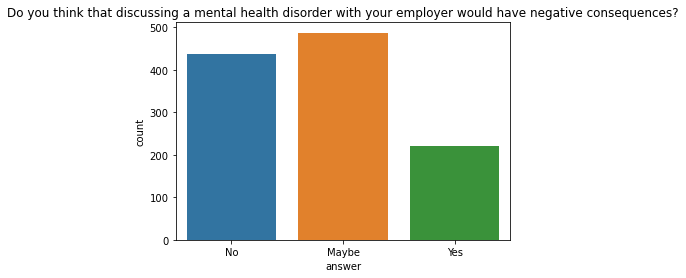

In [355]:
display(mh_issue_discussion_employer_negative, 90)

In [356]:
questions.question[91]

'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?'

# 1.92 Distribution of people who have heard or observed negative consequences for co-workers who have been open about mental health issues

In [357]:
coworkers_mh_negative_past = answers[answers.question_id == 92 + gap]

In [358]:
coworkers_mh_negative_past.answer.value_counts()

No     1048
Yes      98
Name: answer, dtype: int64

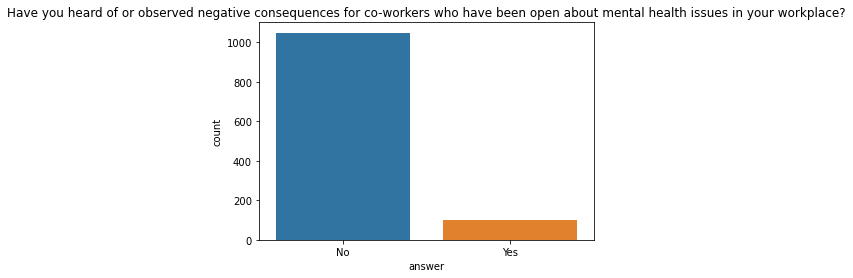

In [359]:
display(coworkers_mh_negative_past, 91)

In [360]:
questions.question[92]

'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?'

# 1.93 Distribution of people who revealed mental health issue to a client and believe that this has impacted them negatively

In [361]:
mental_health_disorder_reveal_clients_negative = answers[answers.question_id == 93 + gap]

In [362]:
mental_health_disorder_reveal_clients_negative.answer.value_counts()

I'm not sure    66
No              42
Yes             36
Name: answer, dtype: int64

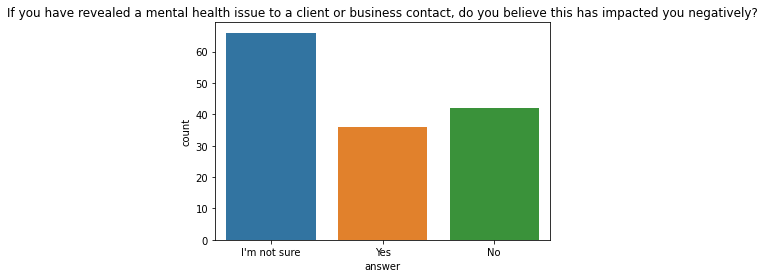

In [363]:
display(mental_health_disorder_reveal_clients_negative, 92)

In [364]:
questions.question[93]

'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?'

# 1.94 Distribution of people who revealed mental health issue to a coworker and believe that this has impacted them negatively

In [365]:
mental_health_disorder_reveal_coworkers_negative = answers[answers.question_id == 94 + gap]

In [366]:
mental_health_disorder_reveal_coworkers_negative.answer.value_counts()

Not applicable to me    133
I'm not sure             62
No                       57
Yes                      35
Name: answer, dtype: int64

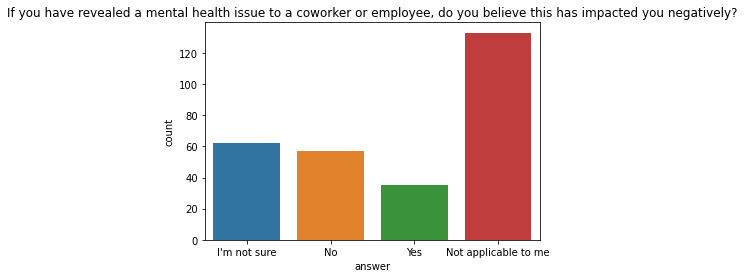

In [367]:
display(mental_health_disorder_reveal_coworkers_negative, 93)

In [368]:
questions.question[94]

'Do you think that discussing a mental health disorder with previous employers would have negative consequences?'

# 1.95 Distribution of people who think that discussing a mental health disorder with previous employers would have negative consequences

In [369]:
mental_health_discussion_employer_prev_negative = answers[answers.question_id == 95 + gap]

In [370]:
mental_health_discussion_employer_prev_negative.answer.value_counts()

Some of them        615
I don't know        310
Yes, all of them    226
None of them        113
Name: answer, dtype: int64

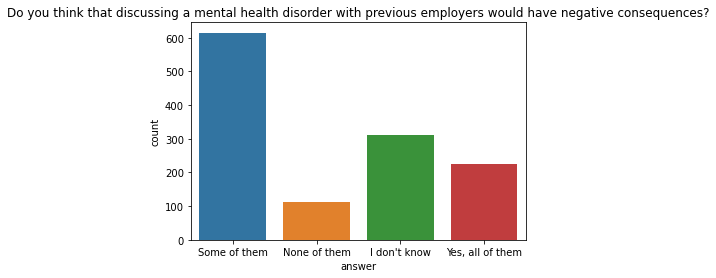

In [371]:
display(mental_health_discussion_employer_prev_negative, 94)

In [372]:
questions.question[95]

'Do you think that discussing a physical health issue with previous employers would have negative consequences?'

# 1.96 Distribution of people who think that discussing a physical health issue with previous employers would have negative consequences

In [373]:
ph_discussion_employer_negative_prev = answers[answers.question_id == 96 + gap]

In [374]:
ph_discussion_employer_negative_prev.answer.value_counts()

Some of them        631
None of them        559
Yes, all of them     74
Name: answer, dtype: int64

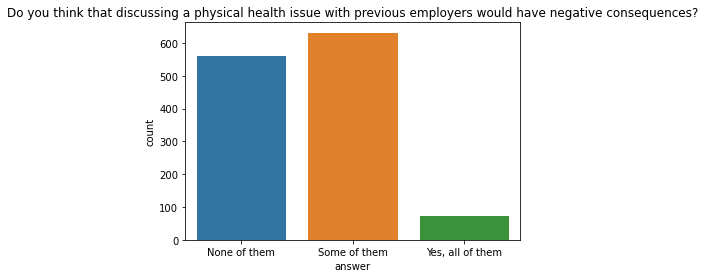

In [375]:
display(ph_discussion_employer_negative_prev, 95)

In [376]:
questions.question[96]

'Would you have been willing to discuss a mental health issue with your previous co-workers?'

# 1.97 Distribution of people who are willing to discuss mental health issue with previous co-workers

In [377]:
coworker_discussion_prev = answers[answers.question_id == 97 + gap]

In [378]:
coworker_discussion_prev.answer.value_counts()

Some of my previous employers           740
No, at none of my previous employers    430
Yes, at all of my previous employers     94
Name: answer, dtype: int64

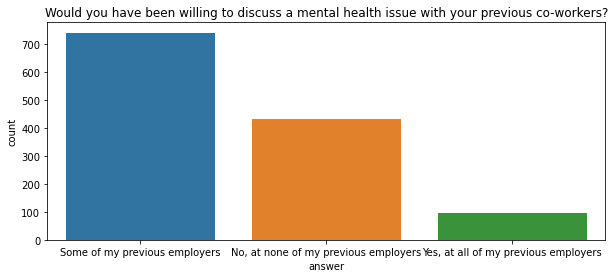

In [379]:
plt.figure(figsize=(10, 4))
display(coworker_discussion_prev, 96)

In [380]:
questions.question[97]

'Did you feel that your previous employers took mental health as seriously as physical health?'

# 1.98 Distribution of people who feel that their previous employers took mental health as seriously as physical health

In [381]:
mh_as_ph_prev = answers[answers.question_id == 98 + gap]

In [382]:
mh_as_ph_prev.answer.value_counts()

None did             463
Some did             427
I don't know         331
Yes, they all did     43
Name: answer, dtype: int64

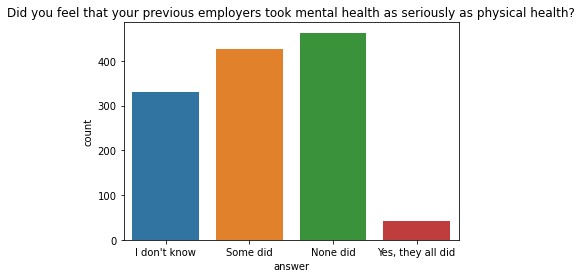

In [383]:
display(mh_as_ph_prev, 97)

In [384]:
questions.question[98]

'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?'

# 1.99 Distribution of coworkers who had negative consequences with mental health issues

In [385]:
coworkers_mh_negative_prev = answers[answers.question_id == 99 + gap]

In [386]:
coworkers_mh_negative_prev.answer.value_counts()

None of them        758
Some of them        444
Yes, all of them     62
Name: answer, dtype: int64

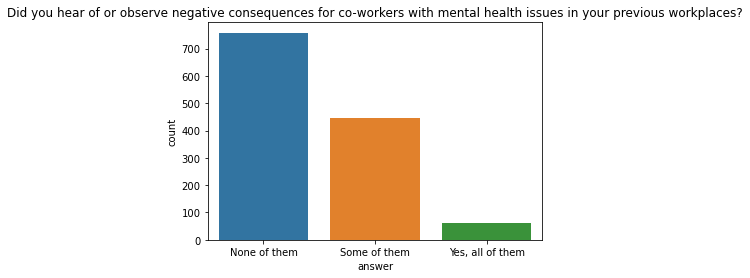

In [387]:
display(coworkers_mh_negative_prev, 98)

In [388]:
questions.question[99]

'Do you feel that being identified as a person with a mental health issue would hurt your career?'

# 1.100 Distributio nof people who feel that being identified as a person with a mental health issue would hurt their career

In [389]:
identified_ill_career = answers[answers.question_id == 100 + gap]

In [390]:
identified_ill_career.answer.value_counts()

Maybe                         588
Yes, I think it would         563
No, I don't think it would    147
Yes, it has                   105
No, it has not                 30
Name: answer, dtype: int64

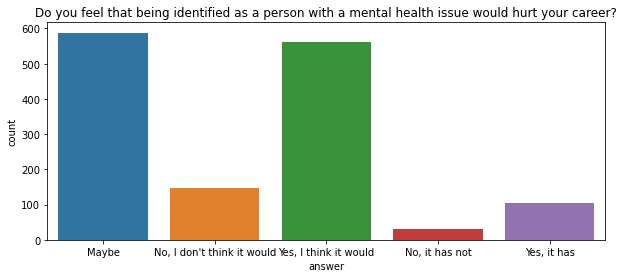

In [391]:
plt.figure(figsize=(10,4))
display(identified_ill_career, 99)

In [392]:
questions.question[100]

'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'

# 1.101 Distribution of people who think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue

In [393]:
viewed_negatively = answers[answers.question_id == 101 + gap]

In [394]:
viewed_negatively.answer.value_counts()

Maybe                           591
Yes, I think they would         403
No, I don't think they would    348
No, they do not                  49
Yes, they do                     42
Name: answer, dtype: int64

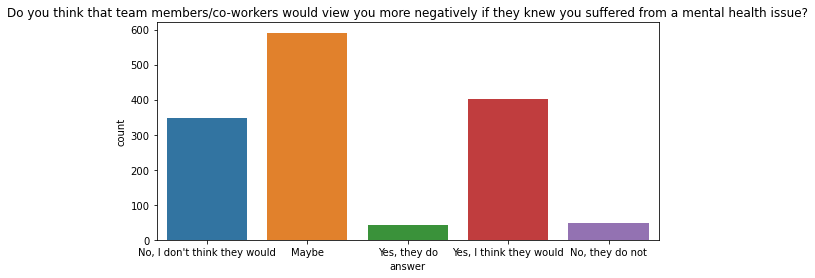

In [395]:
plt.figure(figsize=(9,4))
display(viewed_negatively, 100)

In [396]:
questions.question[101]

'If yes, what condition(s) have you been diagnosed with?'

# 1.102 Diagnoses of people

In [397]:
diagnoses = answers[answers.question_id == 102+gap]

In [398]:
diagnoses.answer.value_counts()[:7]

Mood Disorder (Depression, Bipolar Disorder, etc)      412
Anxiety Disorder (Generalized, Social, Phobia, etc)    345
Attention Deficit Hyperactivity Disorder               121
Post-traumatic Stress Disorder                          69
Obsessive-Compulsive Disorder                           45
Substance Use Disorder                                  39
Stress Response Syndromes                               38
Name: answer, dtype: int64

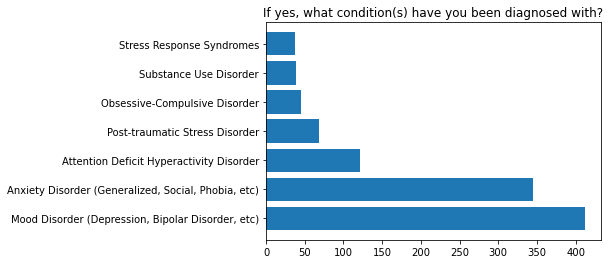

In [399]:
plt.barh(diagnoses.answer.value_counts()[:7].index, diagnoses.answer.value_counts()[:7])
plt.title(questions.question[101])
plt.show()

In [400]:
questions.question[102]

'If maybe, what condition(s) do you believe you have?'

# 1.103 Conditions that people believe they had

In [401]:
conditions_believe = answers[answers.question_id == 103 + gap]

In [402]:
conditions_believe.answer.value_counts()[:7]

Mood Disorder (Depression, Bipolar Disorder, etc)               219
Anxiety Disorder (Generalized, Social, Phobia, etc)             192
Attention Deficit Hyperactivity Disorder                         58
Personality Disorder (Borderline, Antisocial, Paranoid, etc)     42
Stress Response Syndromes                                        40
Obsessive-Compulsive Disorder                                    30
Post-traumatic Stress Disorder                                   26
Name: answer, dtype: int64

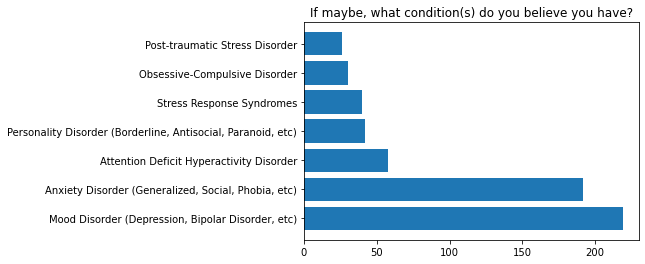

In [403]:
plt.barh(conditions_believe.answer.value_counts()[:7].index, conditions_believe.answer.value_counts()[:7])
plt.title(questions.question[102])
plt.show()

In [404]:
questions.question[103]

'Which of the following best describes your work position?'

# 1.104 Descriptions of work positions

In [405]:
work_position_descriptions = answers[answers.question_id == 104 + gap]

In [406]:
work_position_descriptions.answer.value_counts()

Back-end Developer         737
Front-end Developer        502
DevOps/SysAdmin            282
Supervisor/Team Lead       277
Other                      187
Support                    168
One-person shop            161
Designer                   135
Executive Leadership       101
Dev Evangelist/Advocate     99
Sales                       31
HR                          12
Name: answer, dtype: int64

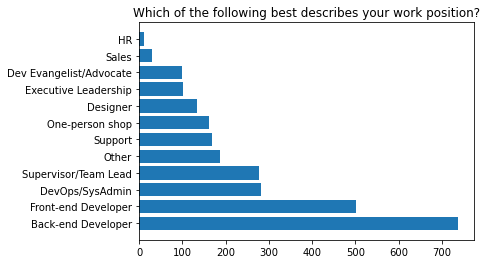

In [407]:
plt.barh(work_position_descriptions.answer.value_counts().index, work_position_descriptions.answer.value_counts())
plt.title(questions.question[103])
plt.show()

In [408]:
questions.question[104]

'Do you work remotely?'

# 1.105 Distribution of people who work remotely

In [409]:
work_remotely = answers[answers.question_id == 105 + gap]

In [410]:
work_remotely.answer.value_counts()

Sometimes    757
Always       343
Never        333
Name: answer, dtype: int64

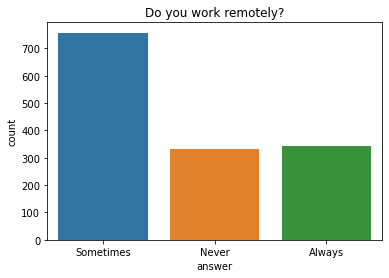

In [411]:
display(work_remotely, 104)

# 2. Analyzing data

In [412]:
answers[answers.year == 2014].question_id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
      dtype=int64)

In [413]:
answers[answers.year == 2016].question_id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  90,  91, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 118, 115, 116, 117], dtype=int64)

In [414]:
answers[answers.year == 2017].question_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 85, 86, 87, 88, 89], dtype=int64)

In [415]:
answers[answers.year == 2018].question_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 85, 86, 87, 88, 89], dtype=int64)

In [416]:
answers[answers.year == 2019].question_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 85, 86, 87, 88, 89], dtype=int64)

In [417]:
for i in range(len(questions)):
    print(i+ 1, questions.question[i])

1 What is your age?
2 What is your gender?
3 What country do you live in?
4 If you live in the United States, which state or territory do you live in?
5 Are you self-employed?
6 Do you have a family history of mental illness?
7 Have you ever sought treatment for a mental health disorder from a mental health professional?
8 How many employees does your company or organization have?
9 Is your employer primarily a tech company/organization?
10 Does your employer provide mental health benefits as part of healthcare coverage?
11 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
12 Would you bring up a mental health issue with a potential employer in an interview?
13 Is your primary role within your company related to tech/IT?
14 Do you know the options for mental health care available under your employer-provided health coverage?
15 Has your employer ever formally discussed mental health (for exampl

# Question 1: What is the rate of people who experience some form of mental illness? Is it less or more than 19 percent?

In [418]:
str(round(len(mental_health_disorder_curr[mental_health_disorder_curr.answer=='Yes']) / len(mental_health_disorder_curr) * 100, 2))+'%'

'41.82%'

The percent of people who currently have mental health disorder is **41.82 %**.

In [419]:
str(round(len(mental_health_disorder_past[mental_health_disorder_past.answer=='Yes']) / len(mental_health_disorder_past) * 100, 2))+'%'

'48.15%'

The percent of people who had mental health disorder before is **48.15 %**.

We can see that the percent of people with mental health disorder before and currently is slightly above 2 times more than 19 percent. It would be interesting to see how much of the people had and currently have mental health disorder as well as those who had and currently don't and the inverse. We will combine that with the percent of people who sought treatment for their mental health disorder.

We will merge the needed tables by user id. That way we can understand how every person answered on each question, while the answers will coinscide to the certain person.

In [420]:
plot_3 = pd.merge(mental_health_disorder_curr, mental_health_disorder_past, on='user_id')

In [421]:
plot_3 = pd.merge(plot_3, people_sought_treatment, on='user_id')

In [422]:
plot_3 = plot_3.drop(columns=['year_x', 'year_y', 'year', 'question_id_x', 'question_id_y', 'question_id'])

In [423]:
plot_3.answer_x = plot_3.answer_x.replace(['Maybe', 'Possibly', "Don't Know"], "Not sure")

In [424]:
plot_3.answer_y = plot_3.answer_y.replace(['Maybe', 'Possibly', "Don't Know"], "Not sure")

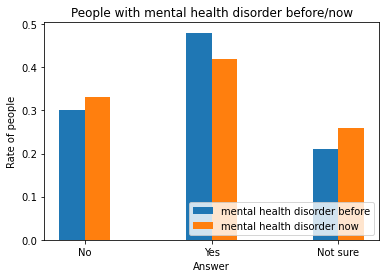

In [425]:
X = plot_3.answer_x.unique()
o = [round(len(plot_3[plot_3.answer_y == a])/len(plot_3),2) for a in X]
o2 = [round(len(plot_3[plot_3.answer_x == a])/len(plot_3),2) for a in X]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, o, 0.2, label='mental health disorder before')
plt.bar(X_axis + 0.1, o2, 0.2, label='mental health disorder now')
plt.xticks(X_axis, X)
plt.legend()
plt.title("People with mental health disorder before/now")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.legend(loc='lower right')
plt.show()

**NOTE**: After merging the 3 datasets, the perentages of the people may not be the same as above.

People before had more mental health disorder than currenly. The percentage of people who answered that either they don't have mental health disorder or are not sure if they have mental health disorder is increasing form before to currently.

In [426]:
str(round(len(plot_3[(plot_3.answer_y=='Yes')&(plot_3.answer_x=='Yes')]) / len(plot_3) * 100, 2))+'%'

'35.54%'

The percent of people who had and currently have mental health disorder is **35.54 %**.

In [427]:
str(round(len(plot_3[(plot_3.answer_y=='Yes')&(plot_3.answer_x=='No')]) / len(plot_3) * 100, 2))+'%'

'5.37%'

The percent of people that had mental health disorder before, but currently don't is **5.37 %**.

In [428]:
str(round(len(plot_3[(plot_3.answer_y=='No')&(plot_3.answer_x=='Yes')]) / len(plot_3) * 100, 2))+'%'

'2.0%'

The percent of people that didn't have mental health disorder before, but currently have is **2.00 %**.

Now we will take a look at people who had and currently have mental health disorder have they sought treatment.

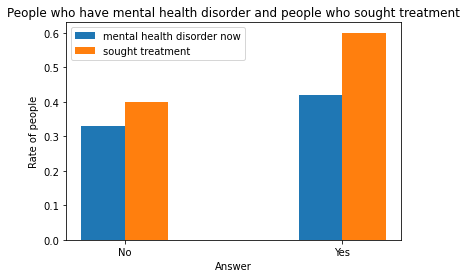

In [429]:
X = plot_3.answer.unique()
o = [round(len(plot_3[plot_3.answer_x == a])/len(plot_3),2) for a in X]
o2 = [round(len(plot_3[plot_3.answer == a])/len(plot_3),2) for a in X]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, o, 0.2, label='mental health disorder now')
plt.bar(X_axis + 0.1, o2, 0.2, label='sought treatment')
plt.xticks(X_axis, X)
plt.legend()
plt.title("People who have mental health disorder and people who sought treatment")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.show()

As we can see, 60% of the people sought treatment and 40% haven't sought treatment. Now, let's see what percent of the people who had mental health disorder sought treatment.

In [430]:
str(round(len(plot_3[(plot_3.answer_x == 'Yes')&(plot_3.answer == 'Yes')])/len(plot_3)*100,2)) + '%'

'38.74%'

The percent of people that sought treatment and currently have mental health disorder is **38.74 %**.

In [431]:
str(round(len(plot_3[(plot_3.answer_x == 'Not sure')&(plot_3.answer == 'Yes')])/len(plot_3)*100,2)) + '%'

'12.54%'

The percent of people who sought treatment and weren't sure if they had mental health disorder is **12.54 %**.

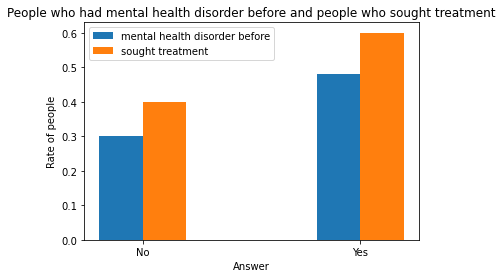

In [432]:
X = plot_3.answer.unique()
o = [round(len(plot_3[plot_3.answer_y == a])/len(plot_3),2) for a in X]
o2 = [round(len(plot_3[plot_3.answer == a])/len(plot_3),2) for a in X]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, o, 0.2, label='mental health disorder before')
plt.bar(X_axis + 0.1, o2, 0.2, label='sought treatment')
plt.xticks(X_axis, X)
plt.legend()
plt.title("People who had mental health disorder before and people who sought treatment")
plt.xlabel('Answer')
plt.ylabel('Rate of people')

plt.show()

In [433]:
str(round(len(plot_3[(plot_3.answer_y == 'Yes')&(plot_3.answer == 'Yes')])/len(plot_3)*100,2)) + '%'

'44.78%'

The percent of people who sought treatment and had mental health disorder is **44.78 %**.

In [434]:
str(round(len(plot_3[(plot_3.answer_y == 'Not sure')&(plot_3.answer == 'Yes')])/len(plot_3)*100,2)) + '%'

'10.57%'

The percent of people who sought treatment and are not sure if they had mental health disorder before is **10.57 %**.

Let's compare the rate of people who sought treatment and wether the employer offeres resources to learn more about mental health disorders and options for seeking help.

In [435]:
plot_13 = pd.merge(people_sought_treatment, resources_for_mental_health_employer, on='user_id')

In [436]:
plot_13 = plot_13.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

In [437]:
plot_13.answer_x.unique()

array(['No', 'Yes'], dtype=object)

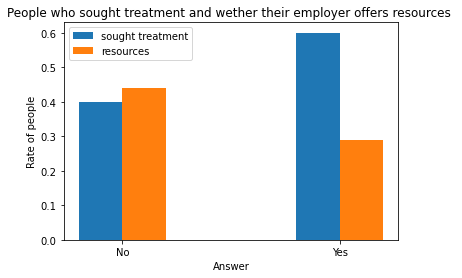

In [438]:
X = plot_13.answer_x.unique()
o = [round(len(plot_13[plot_13.answer_x == a])/len(plot_13),2) for a in X]
o2 = [round(len(plot_13[plot_13.answer_y == a])/len(plot_13),2) for a in X]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, o, 0.2, label='sought treatment')
plt.bar(X_axis + 0.1, o2, 0.2, label='resources')
plt.xticks(X_axis, X)
plt.legend()
plt.title("People who sought treatment and wether their employer offers resources ")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.show()

In [439]:
str(round(len(plot_13[(plot_13.answer_x == 'Yes')&(plot_13.answer_y=="Yes")])/len(plot_13[plot_13.answer_x=="Yes"])*100, 2))+'%'

'32.47%'

32.47 percent of the people who sought treatment, their employer offers resources to learn more about mental health disorders and options for seeking help

In [440]:
str(round(len(plot_13[(plot_13.answer_x == 'Yes')&(plot_13.answer_y=="No")])/len(plot_13[plot_13.answer_x=="Yes"])*100, 2))+'%'

'42.86%'

42.86 percent of the people who sought treatment, their employer doesn't offer resources to learn more about mental health disorders and options for seeking help

In [441]:
str(round(len(plot_13[(plot_13.answer_x == 'No')&(plot_13.answer_y=="Yes")])/len(plot_13[plot_13.answer_x=="No"])*100, 2))+'%'

'22.91%'

22.91 percent of the people who didn't sought treatment, their employer offers resources to learn more about mental health disorders and options for seeking help

In [442]:
str(round(len(plot_13[(plot_13.answer_x == 'No')&(plot_13.answer_y=="No")])/len(plot_13[plot_13.answer_x=="No"])*100, 2))+'%'

'46.12%'

46.12 percent of the people who didn't sought treatment, their employer doesn't offer resources to learn more about mental health disorders and options for seeking help

Another interesting thing we can see is how much of the people who currently have mental health disorder have family history of mental health illness.

In [443]:
plot_2 = pd.merge(mental_health_disorder_curr, family_history, on='user_id')

In [444]:
plot_2 = plot_2.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

In [445]:
plot_2.answer_x.unique(), plot_2.answer_y.unique()

(array(['No', 'Yes', 'Maybe', 'Possibly', "Don't Know"], dtype=object),
 array(['No', 'Yes', "I don't know"], dtype=object))

In [446]:
plot_2.answer_x = plot_2.answer_x.replace(['Maybe', 'Possibly', "Don't Know"], "Not sure")

In [447]:
plot_2.answer_y = plot_2.answer_y.replace("I don't know", 'Not sure')

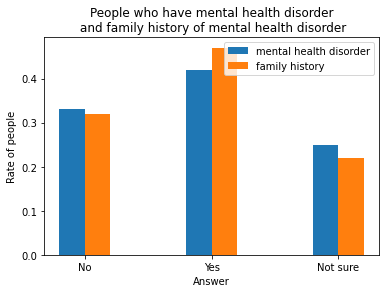

In [448]:
X = plot_2.answer_x.unique()
o = [round(len(plot_2[plot_2.answer_x == a])/len(plot_2),2) for a in X]
o2 = [round(len(plot_2[plot_2.answer_y == a])/len(plot_2),2) for a in X]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, o, 0.2, label='mental health disorder')
plt.bar(X_axis + 0.1, o2, 0.2, label='family history')
plt.xticks(X_axis, X)
plt.legend()
plt.title("People who have mental health disorder\n and family history of mental health disorder")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.show()

As we can see, over 40% of the people have family history. Let's see how much of them currently have mental health disorder.

In [449]:
str(round(len(plot_2[(plot_2.answer_x == 'Yes')&(plot_2.answer_y == 'Yes')])/len(plot_2)*100,2)) + '%'

'27.48%'

The percentage of people who have family history of mental health illness and currently have mental health diosrder is **27.48 %**.

# Question 2: Does the rate of mental health disorder rate increase as the age increases?

In [450]:
plot_1 = pd.merge(mental_health_disorder_curr,ages , on='user_id')

In [451]:
intervals = ['15-23', '24-29', '30-34', '35-49', '50-64','65+']

In [452]:
plot_1['ages'] = pd.cut(plot_1.answer_y, bins=[0,23,29,34,49,64,100], labels=intervals)

In [453]:
plot_1.ages.value_counts()

35-49    1167
30-34     756
24-29     709
15-23     158
50-64     154
65+         6
Name: ages, dtype: int64

In [454]:
plot_1.answer_x = plot_1.answer_x.replace(['Maybe', 'Possibly', "Don't Know"], 'Not sure')

In [455]:
plot_1.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'], inplace=True)

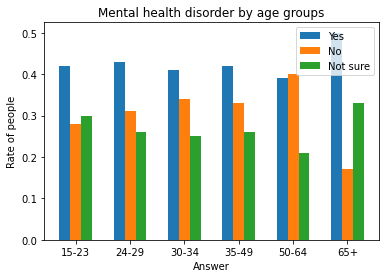

In [456]:
X = ['15-23', '24-29', '30-34', '35-49', '50-64', '65+']
o = [round(len(plot_1[(plot_1.answer_x == 'Yes')&(plot_1['ages']==a)])/len(plot_1[plot_1.ages == a]),2) for a in X]
o2 = [round(len(plot_1[(plot_1.answer_x == 'No')&(plot_1['ages']==a)])/len(plot_1[plot_1.ages == a]),2) for a in X]
o3 = [round(len(plot_1[(plot_1.answer_x == 'Not sure')&(plot_1['ages']==a)])/len(plot_1[plot_1.ages == a]),2) for a in X]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, o, 0.2, label='Yes')
plt.bar(X_axis, o2, 0.2, label='No')
plt.bar(X_axis + 0.2, o3, 0.2, label='Not sure')
plt.xticks(X_axis, X)
plt.legend()
plt.title("Mental health disorder by age groups")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.show()

People in the age group **65+** don't have  enough records to make conlcusions. Apart from that, we can see that the rate of people who don't have *mental health disorder* is *increasing* as the age *increases*, but the rate of people who have *mental health disorder* stays around **40%** as the age *increases*. From this ***we can't conclude that as the age increases, the rate of people who have mental health disorder increases, but what we can conclude is that the rate of people who don't have mental health disorder increases as the age increases***.

In [457]:
plot_4 = pd.merge(mental_health_disorder_diagnosed, plot_1, on='user_id')

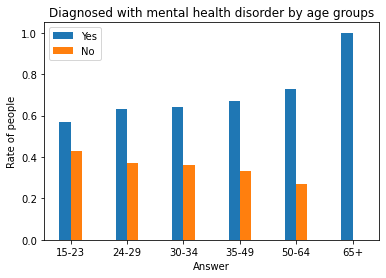

In [458]:
X = ['15-23', '24-29', '30-34', '35-49', '50-64', '65+']
o = [round(len(plot_4[(plot_4.answer == 'Yes')&(plot_4['ages']==a)])/len(plot_4[plot_4.ages == a]),2) for a in X]
o2 = [round(len(plot_4[(plot_4.answer == 'No')&(plot_4['ages']==a)])/len(plot_4[plot_4.ages == a]),2) for a in X]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, o, 0.2, label='Yes')
plt.bar(X_axis + 0.1, o2, 0.2, label='No')
plt.xticks(X_axis, X)
plt.legend()
plt.title("Diagnosed with mental health disorder by age groups")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.show()

From this plot we can conclude that ***as the age increases, more people the rate of the people who are diagnosed with mental health disorder increases and the rate of people who aren't diagnosed decreases***.

Other insights from the data:

In [459]:
str(round(len(plot_4[(plot_4.answer == 'Yes')&(plot_4.answer_x=='Not sure')])/len(plot_4[plot_4.answer_x == 'Not sure']), 2) * 100) + '%'

'38.0%'

38 percent of the people who are not sure if they currently have mental health disorder have been diagnosed with mental health disorder. The other 62 percent haven't been diagnosed.

In [460]:
str(round(len(plot_4[(plot_4.answer == 'Yes')&(plot_4.answer_x=='Yes')])/len(plot_4[plot_4.answer_x == 'Yes']), 2) * 100) + '%'

'94.0%'

94 percent of the people who currently have mental health disorder have been diagnosed with mental health disorder. The other 6 percent haven't been diagnosed.

In [461]:
str(round(len(plot_4[(plot_4.answer == 'Yes')&(plot_4.answer_x=='No')])/len(plot_4[plot_4.answer_x == 'No']), 2) * 100) + '%'

'15.0%'

15 percent of the people who currently don't have mental health disorder have been diagnosed with mental health disorder. The other 85 percent haven't been diagnosed.

In [462]:
plot_15 = pd.merge(mental_health_disorder_interferes_eff, plot_1, on='user_id')

In [463]:
plot_15 = plot_15.drop(columns=['year', 'question_id'])

In [464]:
questions.question[34]

'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?'

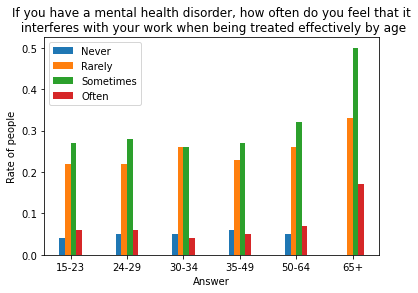

In [465]:
X = ['15-23', '24-29', '30-34', '35-49', '50-64', '65+']
o = [round(len(plot_15[(plot_15.answer == 'Never')&(plot_15['ages']==a)])/len(plot_15[plot_15.ages == a]),2) for a in X]
o2 = [round(len(plot_15[(plot_15.answer == 'Rarely')&(plot_15['ages']==a)])/len(plot_15[plot_15.ages == a]),2) for a in X]
o3 = [round(len(plot_15[(plot_15.answer == 'Sometimes')&(plot_15['ages']==a)])/len(plot_15[plot_15.ages == a]),2) for a in X]
o4 = [round(len(plot_15[(plot_15.answer == 'Often')&(plot_15['ages']==a)])/len(plot_15[plot_15.ages == a]),2) for a in X]

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.15, o, 0.1, label='Never')
plt.bar(X_axis - 0.05, o2, 0.1, label='Rarely')
plt.bar(X_axis + 0.05, o3, 0.1, label='Sometimes')
plt.bar(X_axis + 0.15, o4, 0.1, label='Often')
plt.xticks(X_axis, X)
plt.legend()
plt.title("If you have a mental health disorder, how often do you feel that it\n interferes with your work when being treated effectively by age")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.show()

From this plot we can see that the rate of people that answered **"Sometimes"** and **"Often"** is the lowest in the **30-34** age group and *increases* from **30-34 to 65**. The rate of people who answered **"Rarely"** *increases* from **15-23 to 30-34**, then decreases at **35-49** and *increases* from there. However, in each age group, **the most common answers are "Rarely" and "Sometimes"**. From this we can conclude that ***when being treated effectively, mental health disorders rarely or sometimes in most of the cases interfere with the work of people of all age groups***.

In [466]:
plot_18 = pd.merge(mental_health_disorder_interferes_not_eff, plot_1, on='user_id')

In [467]:
plot_18 = plot_18.drop(columns=['year', 'question_id'])

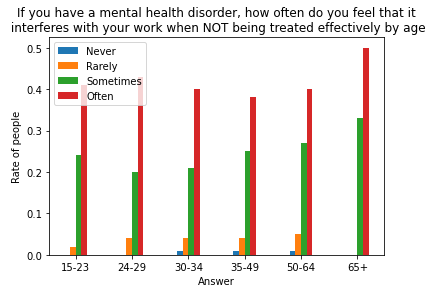

In [468]:
X = ['15-23', '24-29', '30-34', '35-49', '50-64', '65+']
o = [round(len(plot_18[(plot_18.answer == 'Never')&(plot_18['ages']==a)])/len(plot_18[plot_18.ages == a]),2) for a in X]
o2 = [round(len(plot_18[(plot_18.answer == 'Rarely')&(plot_18['ages']==a)])/len(plot_18[plot_18.ages == a]),2) for a in X]
o3 = [round(len(plot_18[(plot_18.answer == 'Sometimes')&(plot_18['ages']==a)])/len(plot_18[plot_18.ages == a]),2) for a in X]
o4 = [round(len(plot_18[(plot_18.answer == 'Often')&(plot_18['ages']==a)])/len(plot_18[plot_18.ages == a]),2) for a in X]

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.15, o, 0.1, label='Never')
plt.bar(X_axis - 0.05, o2, 0.1, label='Rarely')
plt.bar(X_axis + 0.05, o3, 0.1, label='Sometimes')
plt.bar(X_axis + 0.15, o4, 0.1, label='Often')
plt.xticks(X_axis, X)
plt.legend(loc='upper left')
plt.title("If you have a mental health disorder, how often do you feel that it\n interferes with your work when NOT being treated effectively by age")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.show()

The only tendency here is that from **24-29**, the rate of people who answered **"Sometimes"** *increases* as the age *increases*. Despite form that, ***when not being treated effectively, mental health disorders interfere with the work of people of all age groups sometimes in some of the cases and often in most of the cases***.

In [469]:
plot_16 = pd.merge(mental_health_discussion_coworkers, plot_1, on='user_id')

In [470]:
plot_16 = plot_16.drop(columns=['year', 'question_id'])

In [471]:
plot_16.answer.unique()

array(['Maybe', 'Yes', 'No'], dtype=object)

In [472]:
questions.question[17]

'Would you feel comfortable discussing a mental health issue with your coworkers?'

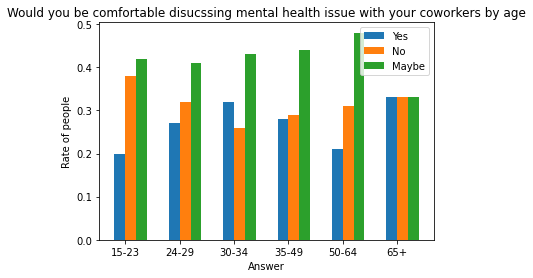

In [473]:
X = ['15-23', '24-29', '30-34', '35-49', '50-64', '65+']
o = [round(len(plot_16[(plot_16.answer == 'Yes')&(plot_16['ages']==a)])/len(plot_16[plot_16.ages == a]),2) for a in X]
o2 = [round(len(plot_16[(plot_16.answer == 'No')&(plot_16['ages']==a)])/len(plot_16[plot_16.ages == a]),2) for a in X]
o3 = [round(len(plot_16[(plot_16.answer == 'Maybe')&(plot_16['ages']==a)])/len(plot_16[plot_16.ages == a]),2) for a in X]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, o, 0.2, label='Yes')
plt.bar(X_axis + 0.1, o2, 0.2, label='No')
plt.bar(X_axis + 0.3, o3, 0.2, label='Maybe')
plt.xticks(X_axis, X)
plt.legend()
plt.title("Would you be comfortable disucssing mental health issue with your coworkers by age")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.show()

In [474]:
plot_16[plot_16.ages=='65+']

,answer,user_id,answer_x,answer_y,ages
578,Yes,1962,Yes,66,65+
1164,No,2720,Yes,66,65+
2112,Maybe,3828,Not sure,65,65+


From this plot we can see that from **15-23 to 30-34**, the rate of people who answered **"Yes"** *increases* and the rate of people who answered **"No"** *decreases*. From **35-49 to 50-64**, **the opposite happens**. From this we can conclude that ***people in the age category 30-34 feel most comfortable to discuss mental health issue with coworkers***.

In [475]:
str(round(len(plot_16[(plot_16.answer=='Yes')&(plot_16.answer_x=='Yes')])/len(plot_16[plot_16.answer_x=="Yes"])*100, 2)) + '%'

'30.43%'

30.43 percent of the people who have mental health disorder would feel comortable discussing mental health issue with coworkers.

In [476]:
str(round(len(plot_16[(plot_16.answer=='No')&(plot_16.answer_x=='Yes')])/len(plot_16[plot_16.answer_x=="Yes"])*100, 2)) + '%'

'28.18%'

28.12 percent of the people who have mental health disorder wouldn't feel comfortable discussing mental health issue with coworkers.

In [477]:
plot_17 = pd.merge(less_likely_to_discuss, plot_1, on='user_id')

In [478]:
plot_17 = plot_17.drop(columns=['year', 'question_id'])

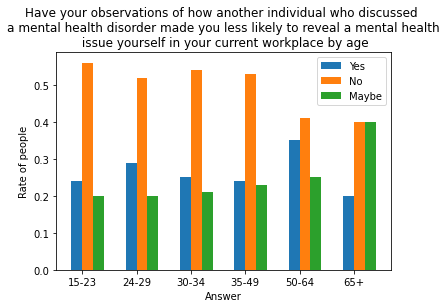

In [479]:
X = ['15-23', '24-29', '30-34', '35-49', '50-64', '65+']
o = [round(len(plot_17[(plot_17.answer == 'Yes')&(plot_17['ages']==a)])/len(plot_17[plot_17.ages == a]),2) for a in X]
o2 = [round(len(plot_17[(plot_17.answer == 'No')&(plot_17['ages']==a)])/len(plot_17[plot_17.ages == a]),2) for a in X]
o3 = [round(len(plot_17[(plot_17.answer == 'Maybe')&(plot_17['ages']==a)])/len(plot_17[plot_17.ages == a]),2) for a in X]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1, o, 0.2, label='Yes')
plt.bar(X_axis + 0.1, o2, 0.2, label='No')
plt.bar(X_axis + 0.3, o3, 0.2, label='Maybe')
plt.xticks(X_axis, X)
plt.legend()
plt.title("Have your observations of how another individual who discussed \na mental health disorder made you less likely to reveal a mental health\n issue yourself in your current workplace by age")
plt.xlabel('Answer')
plt.ylabel('Rate of people')
plt.show()

In [480]:
plot_17[plot_17.ages=='65+']

,answer,user_id,answer_x,answer_y,ages
313,Maybe,1962,Yes,66,65+
396,No,2146,Yes,65,65+
676,No,2720,Yes,66,65+
928,Maybe,3034,Not sure,67,65+
1541,Yes,3828,Not sure,65,65+


From this plot we can only conclude that as the age increases, the rate of people who answered "Maybe" increases.

***While the rate of people who currently don't have mental health disorder increases as the age increases, the rate of people who haven't being diagnosed with mental health disorder decreases as the age increases. The rate of people who currently have mental health disorder stays around 40% as the age increases, but the rate of people who have been diagnosed with mental health disorder increases as the age increases. When being treated effectively, mental health disorders interfere rarely or sometimes with the work of people despite the age group. When NOT being treated effectively, mental health disorders interfere sometimes or often with the work of people despite the age group. Most comfortable to discuss a mental health issue with coworkers are people from the 30-34 age group. These conclusions are not enough to say that the age has something to do with the increase or decreases of the rate of mental health disorder.***

# Question 3: Do people in an age group with more occurences of mental health disorder consume more alcohol or drugs?

To answer this question, we will use mental_health_disorder_diagnosed data by age groups, because only there we can find tendency of increasing rate of mental health disorder.

To answer this question, we will have to read a second dataset, containing information about the of people who use alcohol and different drugs, as well as the median number of times people in an age group have used alcohol and different drugs in the past 12 months. Originally it has many age groups, but we will reduce them to the 6 we used above in order the information to match.

# Drug use by age

In [481]:
drug_use = pd.read_csv('drug-use-by-age.csv')

In [482]:
drug_use.drop(drug_use[drug_use.age.isin(['12', '13', '14'])].index, inplace=True)

In [483]:
columns_frug_use = drug_use.columns

In [484]:
drug_use = drug_use.replace('-', 0)

In [485]:
convert_dict = {column: np.float64 for column in drug_use.columns if column not in ['age', 'n']}

In [486]:
drug_use = drug_use.astype(convert_dict)

In [487]:
avg_15_23 = [round(sum(drug_use[drug_use['age'].isin(['15', '16', '17', '18', '19', '20', '21', '22-23'])][column]) / len(drug_use[drug_use['age'].isin(['15', '16', '17', '18', '19', '20', '21', '22-23'])][column]), 1) for column in drug_use.columns if column not in ['age', 'n']]

In [488]:
avg_15_23.insert(0, '15-23')

In [489]:
avg_15_23.insert(1, sum(drug_use[drug_use['age'].isin(['15', '16', '17', '18', '19', '20', '21', '22-23'])]['n']))

In [490]:
drug_use = pd.DataFrame(np.insert(drug_use.values, 0, avg_15_23, axis=0))

In [491]:
drug_use.drop(drug_use[drug_use[0].isin(['15', '16', '17', '18', '19', '20', '21', '22-23'])].index, inplace=True)

In [492]:
avg_24_29 = [round(sum(drug_use[drug_use[0].isin(['24-25', '26-29'])][column]) / len(drug_use[drug_use[0].isin(['24-25', '26-29'])][column]), 1) for column in drug_use.columns if column not in [0, 1]]

In [493]:
avg_24_29.insert(0, '24-29')
avg_24_29.insert(1, sum(drug_use[drug_use[0].isin(['24-25', '26-29'])][1]))

In [494]:
drug_use = pd.DataFrame(np.insert(drug_use.values, 1, avg_24_29, axis=0))

In [495]:
drug_use.drop(drug_use[drug_use[0].isin(['24-25', '26-29'])].index, inplace=True)

In [496]:
drug_use.columns = columns_frug_use

In [497]:
drug_use = drug_use.astype(convert_dict)

In [498]:
drug_use

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,15-23,23076,59.9,30.1,28.4,45.9,3.1,5.6,0.3,8.8,...,1.4,8.8,3.8,8.5,3.0,8.8,0.5,33.9,0.3,15.1
1,24-29,7219,81.9,52.0,22.9,56.0,3.6,5.5,0.5,6.0,...,1.2,16.8,4.2,10.0,2.5,8.5,0.6,25.5,0.3,10.8
4,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
5,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
6,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
7,65+,2448,49.3,52.0,1.2,36.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,5.0,0.0,364.0,0.0,0.0,0.0,15.0


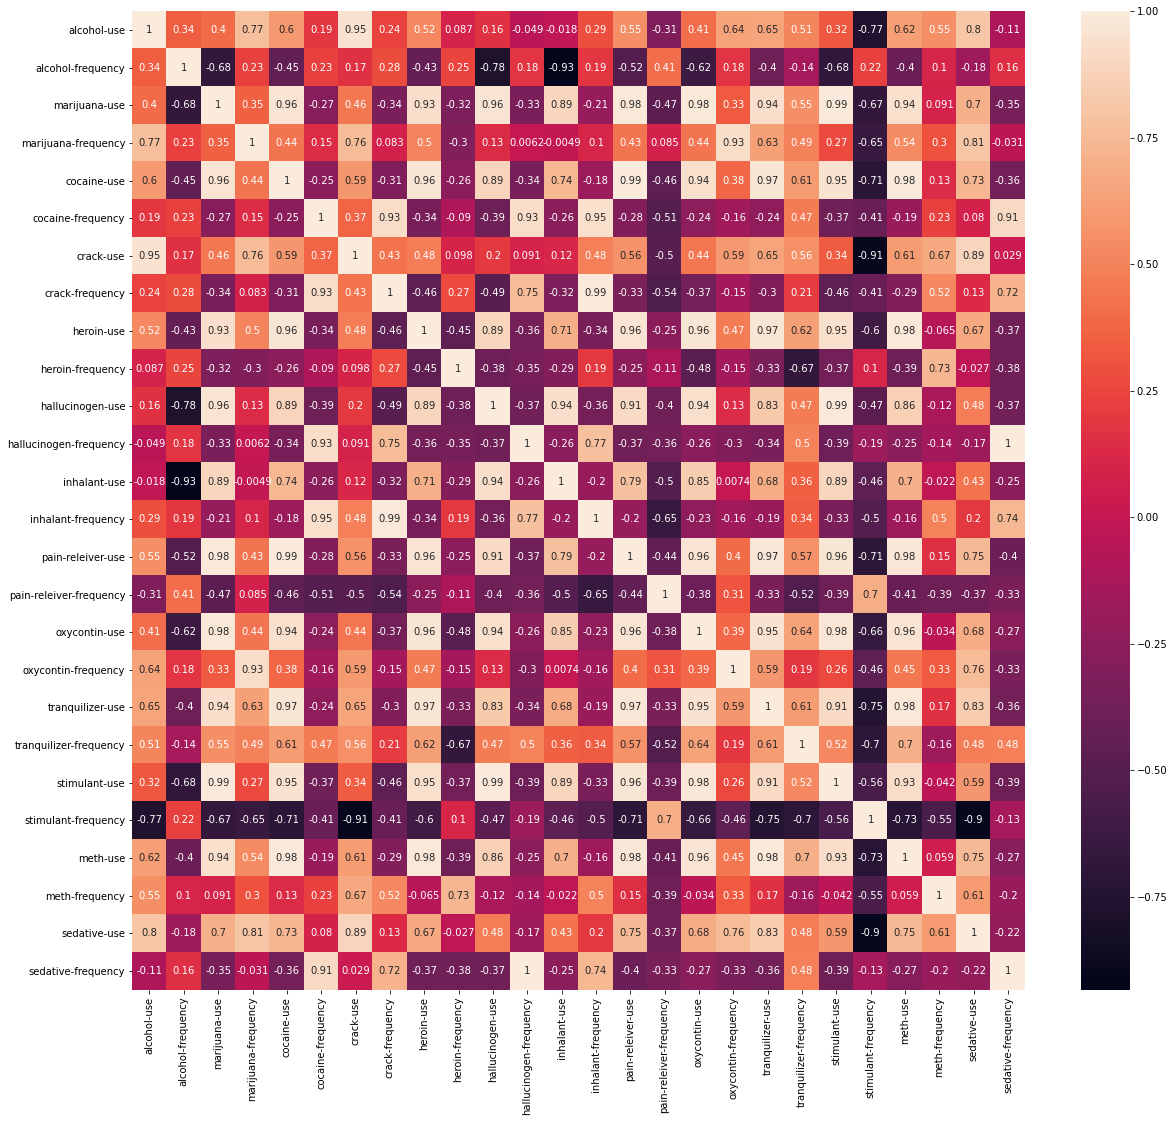

In [499]:
plt.figure(figsize=(20,18))
seaborn.heatmap(drug_use.corr(),annot=True)
plt.show()

In [500]:
plot_0 = pd.merge(mental_health_disorder_diagnosed,ages , on='user_id')

In [501]:
intervals = ['15-23', '24-29', '30-34', '35-49', '50-64','65+']

In [502]:
plot_0['ages'] = pd.cut(plot_0.answer_y, bins=[0,23,29,34,49,64,100], labels=intervals)

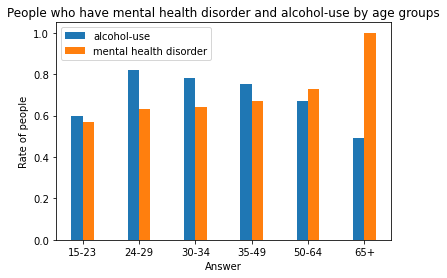

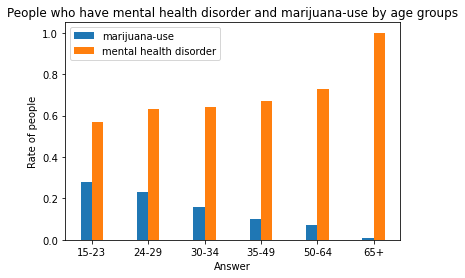

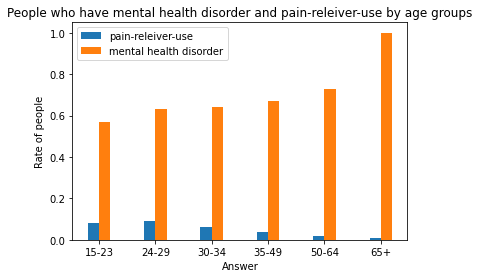

In [503]:
for drug in ['alcohol-use', 'marijuana-use', 'pain-releiver-use']:
    X = ['15-23', '24-29', '30-34', '35-49', '50-64', '65+']
    o = [round(drug_use[drug_use.age == a][drug]/100, 2) for a in X]
    o = np.array(list(map(np.float, o)))
    o2 = [round(len(plot_0[(plot_0.answer_x == 'Yes')&(plot_0['ages']==a)])/len(plot_0[plot_0.ages == a]),2) for a in X]
    X_axis = np.arange(len(X))
    plt.bar(X_axis - 0.1, o, 0.2, label=drug)
    plt.bar(X_axis + 0.1, o2, 0.2, label='mental health disorder')
    plt.xticks(X_axis, X)
    plt.legend()
    plt.title(f"People who have mental health disorder and {drug} by age groups")
    plt.xlabel('Answer')
    plt.ylabel('Rate of people')
    plt.show()

***In these 3 plots we can see that as the rate of people who are diagnosed with mental health disorder increases as the age increases, we see that the rate of people who use alcohol, marijuana and pain-relievers decrease as the age increases. From this we can conclude that age groups with higher rate of diagnosed with mental health disorder use less alcohol, marijuana and pain-releivers***.

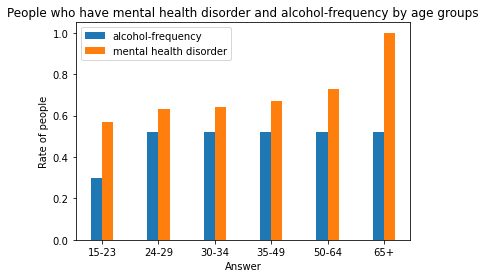

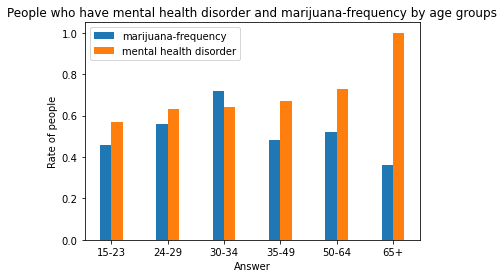

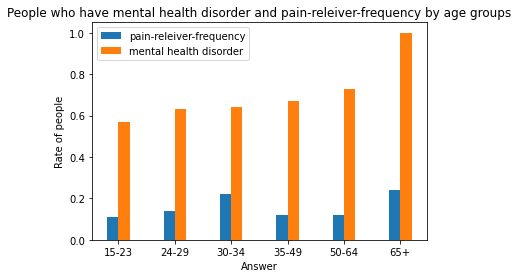

In [504]:
for drug in ['alcohol-frequency', 'marijuana-frequency', 'pain-releiver-frequency']:
    X = ['15-23', '24-29', '30-34', '35-49', '50-64', '65+']
    o = [round(drug_use[drug_use.age == a][drug]/100, 2) for a in X]
    o = np.array(list(map(np.float, o)))
    o2 = [round(len(plot_0[(plot_0.answer_x == 'Yes')&(plot_0['ages']==a)])/len(plot_0[plot_0.ages == a]),2) for a in X]
    X_axis = np.arange(len(X))
    plt.bar(X_axis - 0.1, o, 0.2, label=drug)
    plt.bar(X_axis + 0.1, o2, 0.2, label='mental health disorder')
    plt.xticks(X_axis, X)
    plt.legend()
    plt.title(f"People who have mental health disorder and {drug} by age groups")
    plt.xlabel('Answer')
    plt.ylabel('Rate of people')
    plt.show()

***From these 3 plots we can see that the alcohol frequency remains the same at all age groups, except 15-23, but the frequences of marijuana and pain-releivers are at their highest rates at the age group of 30-34 - this has maybe something to do with how people feel about discussing a mental health illness, where the rate of people who would feel comfortable discussing mental health illness with their coworkers is highest***.

# Question 4: Does the company size affect the rate of mental health disorder and the will of people to share their problem?

In [505]:
plot_5 = pd.merge(people_in_companies, mental_health_disorder_curr, on='user_id')

In [506]:
plot_5 = plot_5.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

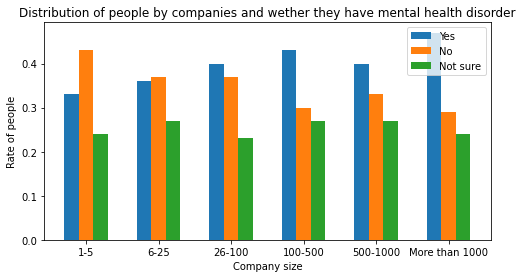

In [507]:
X = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
o = [round(len(plot_5[(plot_5.answer_x==a)&(plot_5.answer_y=='Yes')])/len(plot_5[plot_5.answer_x == a]), 2) for a in X]
o2 = [round(len(plot_5[(plot_5.answer_x==a)&(plot_5.answer_y=='No')])/len(plot_5[plot_5.answer_x == a]), 2) for a in X]
o3 = [round(len(plot_5[(plot_5.answer_x==a)&(plot_5.answer_y.isin(['Maybe', 'Possibly', "Don't Know"]))])/len(plot_5[plot_5.answer_x == a]), 2) for a in X]
X_axis = np.arange(len(X))
plt.figure(figsize=(8,4))
plt.bar(X_axis - 0.2, o, 0.2, label='Yes')
plt.bar(X_axis, o2, 0.2, label='No')
plt.bar(X_axis + 0.2, o3, 0.2, label='Not sure')
plt.xticks(X_axis, X)
plt.legend()
plt.title("Distribution of people by companies and wether they have mental health disorder")
plt.xlabel('Company size')
plt.ylabel('Rate of people')

plt.show()

As we can see, there's **increase** in the rate of people who answered *"Yes"* to the question "Do you currently have a mental health disorder" as the *company size* rises. There's also **decrease** in the poeple who answered *"No"* to the question as the *company size* rises. From this we can conclude that ***as the company size increases, the rate of people with mental health disorder increases***.

In [508]:
plot_6 = pd.merge(people_in_companies, mh_discussion_employer_negative, on='user_id')

In [509]:
plot_6 = plot_6.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

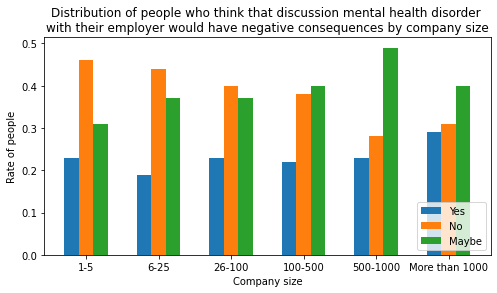

In [510]:
X = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
o = [round(len(plot_6[(plot_6.answer_x==a)&(plot_6.answer_y=='Yes')])/len(plot_6[plot_6.answer_x == a]), 2) for a in X]
o2 = [round(len(plot_6[(plot_6.answer_x==a)&(plot_6.answer_y=='No')])/len(plot_6[plot_6.answer_x == a]), 2) for a in X]
o3 = [round(len(plot_6[(plot_6.answer_x==a)&(plot_6.answer_y=='Maybe')])/len(plot_6[plot_6.answer_x == a]), 2) for a in X]
X_axis = np.arange(len(X))
plt.figure(figsize=(8,4))
plt.bar(X_axis - 0.2, o, 0.2, label='Yes')
plt.bar(X_axis, o2, 0.2, label='No')
plt.bar(X_axis + 0.2, o3, 0.2, label='Maybe')
plt.xticks(X_axis, X)
plt.legend(loc='lower right')
plt.title("Distribution of people who think that discussion mental health disorder \nwith their employer would have negative consequences by company size")
plt.xlabel('Company size')
plt.ylabel('Rate of people')

plt.show()

As we can see, there is **decrease** in the people who don't think that a discussion with their employer would have negative consequences as the *company size rises*. There is **increase** in the people who do think that discussion would have negative consequences as the *company size* rises. There is also **increase** in the people who are not sure about this as the *company size* rises.

In [511]:
plot_7 = pd.merge(people_in_companies, mental_health_discussion_coworkers, on='user_id')

In [512]:
plot_7 = plot_7.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

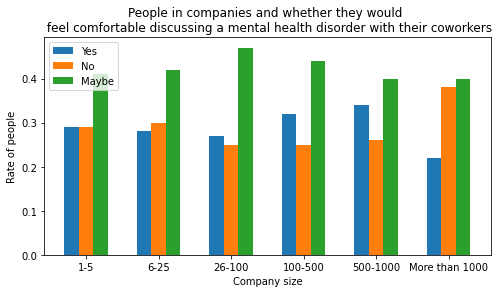

In [513]:
X = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
o = [round(len(plot_7[(plot_7.answer_x==a)&(plot_7.answer_y=='Yes')])/len(plot_7[plot_7.answer_x == a]), 2) for a in X]
o2 = [round(len(plot_7[(plot_7.answer_x==a)&(plot_7.answer_y=='No')])/len(plot_7[plot_7.answer_x == a]), 2) for a in X]
o3 = [round(len(plot_7[(plot_7.answer_x==a)&(plot_7.answer_y=='Maybe')])/len(plot_7[plot_7.answer_x == a]), 2) for a in X]
X_axis = np.arange(len(X))
plt.figure(figsize=(8,4))
plt.bar(X_axis - 0.2, o, 0.2, label='Yes')
plt.bar(X_axis, o2, 0.2, label='No')
plt.bar(X_axis + 0.2, o3, 0.2, label='Maybe')
plt.xticks(X_axis, X)
plt.legend()
plt.title("People in companies and whether they would \n feel comfortable discussing a mental health disorder with their coworkers")
plt.xlabel('Company size')
plt.ylabel('Rate of people')

plt.show()

There are increase in the rate of  people from 26-100 to More than 1000 company size that would not feel comfortable to discuss mental health disorder with their coworkers. But there is also an increase in the rate of people who would feel comfortable from 26-100 to 500-1000. But the lowest rate of people who would feel comfortable is people who work for cmpany with more than 1000 employees.

In [514]:
plot_8 = pd.merge(people_in_companies, less_likely_to_discuss, on='user_id')

In [515]:
plot_8 = plot_8.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

In [516]:
questions.question[30]

'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'

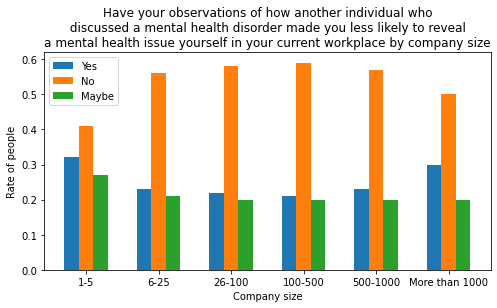

In [517]:
X = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
o = [round(len(plot_8[(plot_8.answer_x==a)&(plot_8.answer_y=='Yes')])/len(plot_8[plot_8.answer_x == a]), 2) for a in X]
o2 = [round(len(plot_8[(plot_8.answer_x==a)&(plot_8.answer_y=='No')])/len(plot_8[plot_8.answer_x == a]), 2) for a in X]
o3 = [round(len(plot_8[(plot_8.answer_x==a)&(plot_8.answer_y=='Maybe')])/len(plot_8[plot_8.answer_x == a]), 2) for a in X]
X_axis = np.arange(len(X))
plt.figure(figsize=(8,4))
plt.bar(X_axis - 0.2, o, 0.2, label='Yes')
plt.bar(X_axis, o2, 0.2, label='No')
plt.bar(X_axis + 0.2, o3, 0.2, label='Maybe')
plt.xticks(X_axis, X)
plt.legend()
plt.title("Have your observations of how another individual who\n discussed a mental health disorder made you less likely to reveal \na mental health issue yourself in your current workplace by company size")
plt.xlabel('Company size')
plt.ylabel('Rate of people')

plt.show()

From this plot we can see that the rate of people who answered **"No"** to the question *increases* from **1-5 to 100-500** *company size* and *decreases* from **100-500 to More than 1000** *company size*. The rate of people who answered **"Yes"** to the question *decreases* from **1-5 to 100-500** *company size* and *increases* from **100-500 to More than 1000** *company size*. From this we can conclude that the ***rate of people whose observations of how another individual who discussed mental health disorder made them less likely to reveal a mental health issue themselves in their current workplace is higher in the smallest and in the largest comapnies - 1-5 and More than 1000 company size***.

In [518]:
plot_9 = pd.merge(people_in_companies, mental_health_benefits, on='user_id')

In [519]:
plot_9 = plot_9.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

In [520]:
questions.question[9]

'Does your employer provide mental health benefits as part of healthcare coverage?'

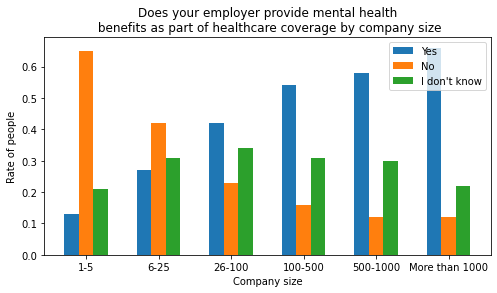

In [521]:
X = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
o = [round(len(plot_9[(plot_9.answer_x==a)&(plot_9.answer_y=='Yes')])/len(plot_9[plot_9.answer_x == a]), 2) for a in X]
o2 = [round(len(plot_9[(plot_9.answer_x==a)&(plot_9.answer_y=='No')])/len(plot_9[plot_9.answer_x == a]), 2) for a in X]
o3 = [round(len(plot_9[(plot_9.answer_x==a)&(plot_9.answer_y=="I don't know")])/len(plot_9[plot_9.answer_x == a]), 2) for a in X]
X_axis = np.arange(len(X))
plt.figure(figsize=(8,4))
plt.bar(X_axis - 0.2, o, 0.2, label='Yes')
plt.bar(X_axis, o2, 0.2, label='No')
plt.bar(X_axis + 0.2, o3, 0.2, label="I don't know")
plt.xticks(X_axis, X)
plt.legend()
plt.title('Does your employer provide mental health\n benefits as part of healthcare coverage by company size')
plt.xlabel('Company size')
plt.ylabel('Rate of people')

plt.show()

From this plot we can see that the rate of people who answered **"Yes"** to the question *increases* as the *company size* *increases* whereas the rate of people who answered **"No"** to the question *decreases* as the *comapny size* *increases*. From this we can conclude that ***the rate of comapnies who provide mental health benefits as part of healthcare coverage increases as the company size increases***.

In [522]:
plot_10 = pd.merge(people_in_companies, mental_health_discussion_employer_formally, on='user_id')

In [523]:
plot_10 = plot_10.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

In [524]:
plot_10.answer_y.unique()

array(['No', 'Yes', "I don't know"], dtype=object)

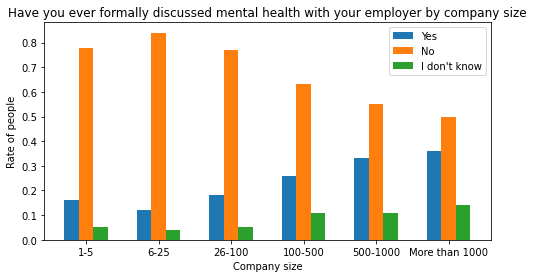

In [525]:
X = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
o = [round(len(plot_10[(plot_10.answer_x==a)&(plot_10.answer_y=='Yes')])/len(plot_10[plot_10.answer_x == a]), 2) for a in X]
o2 = [round(len(plot_10[(plot_10.answer_x==a)&(plot_10.answer_y=='No')])/len(plot_10[plot_10.answer_x == a]), 2) for a in X]
o3 = [round(len(plot_10[(plot_10.answer_x==a)&(plot_10.answer_y=="I don't know")])/len(plot_10[plot_10.answer_x == a]), 2) for a in X]
X_axis = np.arange(len(X))
plt.figure(figsize=(8,4))
plt.bar(X_axis - 0.2, o, 0.2, label='Yes')
plt.bar(X_axis, o2, 0.2, label='No')
plt.bar(X_axis + 0.2, o3, 0.2, label="I don't know")
plt.xticks(X_axis, X)
plt.legend()
plt.title('Have you ever formally discussed mental health with your employer by company size')
plt.xlabel('Company size')
plt.ylabel('Rate of people')

plt.show()

From this plot we can see that as the ***company  size rises, the rate of people who formally discussed mental health with their employer increases and the people who don't decreases***. It's worth noticing that ***companies with size under or equal to 100 have very low rate of discussing mental health***.

In [526]:
plot_11 = pd.merge(people_in_companies, leave_work, on='user_id')

In [527]:
plot_11 = plot_11.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

In [528]:
plot_11.answer_y.unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

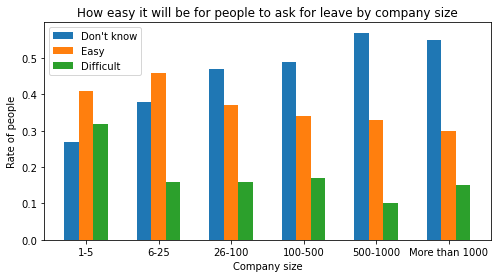

In [529]:
X = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
o = [round(len(plot_11[(plot_11.answer_x==a)&(plot_11.answer_y=="Don't know")])/len(plot_11[plot_11.answer_x == a]), 2) for a in X]
o2 = [round(len(plot_11[(plot_11.answer_x==a)&((plot_11.answer_y=='Very easy')|(plot_11.answer_y=="Somewhat easy"))])/len(plot_11[plot_11.answer_x == a]), 2) for a in X]
o3 = [round(len(plot_11[(plot_11.answer_x==a)&((plot_11.answer_y=='Very difficult')|(plot_11.answer_y=='Somewhat difficult'))])/len(plot_11[plot_11.answer_x == a]), 2) for a in X]

X_axis = np.arange(len(X))
plt.figure(figsize=(8,4))
plt.bar(X_axis - 0.2, o, 0.2, label="Don't know")
plt.bar(X_axis, o2, 0.2, label="Easy")
plt.bar(X_axis + 0.2, o3, 0.2, label="Difficult")
plt.xticks(X_axis, X)
plt.legend()
plt.title('How easy it will be for people to ask for leave by company size')
plt.xlabel('Company size')
plt.ylabel('Rate of people')

plt.show()

From this plot we can see that as the company size increases, the rate of people who answered "Don't know" increases. As the company size increases from 6-26, the rate of people who answered "Easy" decreases. The rate of people who answered "Difficult" is the highest at company size 1-5.

In [530]:
questions.question[15]

'Does your employer offer resources to learn more about mental health disorders and options for seeking help?'

In [531]:
plot_12 = pd.merge(people_in_companies, resources_for_mental_health_employer, on='user_id')

In [532]:
plot_12 = plot_12.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

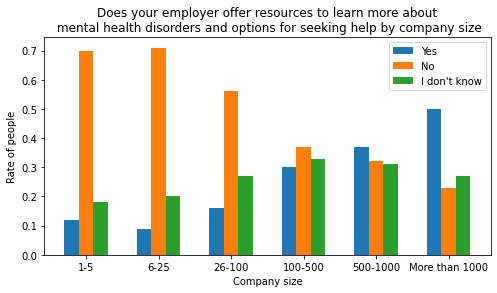

In [533]:
X = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
o = [round(len(plot_12[(plot_12.answer_x==a)&(plot_12.answer_y=='Yes')])/len(plot_12[plot_12.answer_x == a]), 2) for a in X]
o2 = [round(len(plot_12[(plot_12.answer_x==a)&(plot_12.answer_y=='No')])/len(plot_12[plot_12.answer_x == a]), 2) for a in X]
o3 = [round(len(plot_12[(plot_12.answer_x==a)&(plot_12.answer_y=="I don't know")])/len(plot_12[plot_12.answer_x == a]), 2) for a in X]
X_axis = np.arange(len(X))
plt.figure(figsize=(8,4))
plt.bar(X_axis - 0.2, o, 0.2, label='Yes')
plt.bar(X_axis, o2, 0.2, label='No')
plt.bar(X_axis + 0.2, o3, 0.2, label="I don't know")
plt.xticks(X_axis, X)
plt.legend()
plt.title('Does your employer offer resources to learn more about\n mental health disorders and options for seeking help by company size')
plt.xlabel('Company size')
plt.ylabel('Rate of people')

plt.show()

From this plot we can see that the rate of people who answered "Yes" to the question increases as the company size increases and the rate of people who answered "No" decreases as the company size increases. From this we can conclude that ***the rate of companies who offer resources to learn more about mental health disorders and options for seeking help increases as the company size increases***.

In [534]:
plot_14 = pd.merge(people_in_companies, bad_response, on='user_id')

In [535]:
plot_14 = plot_14.drop(columns=['year_x', 'question_id_x', 'year_y', 'question_id_y'])

In [536]:
plot_14.answer_y.unique()

array(['No', 'Maybe/Not sure', 'Yes, I experienced', 'Yes, I observed',
       "I've always been self-employed"], dtype=object)

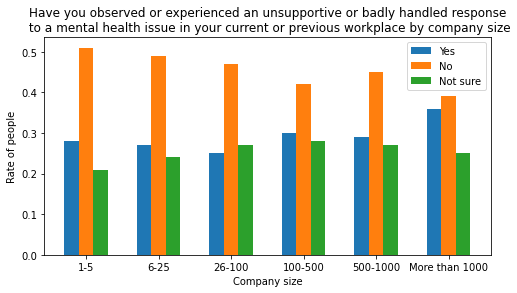

In [537]:
X = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
o = [round(len(plot_14[(plot_14.answer_x==a)&((plot_14.answer_y=='Yes, I experienced')|(plot_14.answer_y=='Yes, I observed'))])/len(plot_14[plot_14.answer_x == a]), 2) for a in X]
o2 = [round(len(plot_14[(plot_14.answer_x==a)&(plot_14.answer_y=="No")])/len(plot_14[plot_14.answer_x == a]), 2) for a in X]
o3 = [round(len(plot_14[(plot_14.answer_x==a)&(plot_14.answer_y=="Maybe/Not sure")])/len(plot_14[plot_14.answer_x == a]), 2) for a in X]
X_axis = np.arange(len(X))
plt.figure(figsize=(8,4))
plt.bar(X_axis - 0.2, o, 0.2, label='Yes')
plt.bar(X_axis, o2, 0.2, label='No')
plt.bar(X_axis + 0.2, o3, 0.2, label="Not sure")


plt.xticks(X_axis, X)
plt.legend()
plt.title('Have you observed or experienced an unsupportive or badly handled response\n to a mental health issue in your current or previous workplace by company size')
plt.xlabel('Company size')
plt.ylabel('Rate of people')

plt.show()

The rate of people who answered **"Yes"** to the question *descreases* from **1-5 to 26-100** *company size* and *increases* from **26-100 to More than 1000**. The rate of people who answered **"No"** to the question *decreases* as the *company size* *increases*. From this we can conclude that ***in companies with size bigger than 100 employees people observe and experience more unsupportive or badly handled response to a mental health issue than companies with size smaller than 100 employees***.

***As the company size increases, the rate of people who have mental health disorder increases. As the company size increases, the rate of people who think or a not sure that a discussion about mental health disorder with their employer would have negative consequences increases. People that would feel less comfortable to discuss mental health issue with thier coworkers are working in companies with More than 1000 employees.  The rate of people whose observations of how another individual who discussed mental health disorder made them less likely to reveal a mental health issue themselves in their current workplace is higher in the smallest and in the largest comapnies - 1-5 and More than 1000 comapny size.  The rate of comapnies who provide mental health benefits as part of healthcare coverage increases as the company size increases. As the company size rises, the rate of people who formally discussed mental health with their employer increases. In companies with size 1-5, it would be the most difficult to ask for leave. The rate of companies who offer resources to learn more about mental health disorders and options for seeking help increases as the company size increases. The bigger the company, the more people who experience or observe an unsupportive or badly handled response to a mental health issue.***

# Conclusion

**Question 1**: According to the American Psychiatric Association 19 % of the people experience some form of mental illness. According to this data, almost 42 % of the people currently have mental health disorder and around 48 % of the people had mental health disorder. The percent of people that sought treatment and currently have mental health disorder is 38.74 %. The percent of people who sought treatment and had mental health disorder before is 44.78 %. The percentage of people who have family history of mental health illness and currently have mental health diosrder is 27.48 %. 

**Question 2**: While the rate of people who currently don't have mental health disorder increases as the age increases, the rate of people who haven't being diagnosed with mental health disorder decreases as the age increases. The rate of people who currently have mental health disorder stays around 40% as the age increases, but the rate of people who have been diagnosed with mental health disorder increases as the age increases. When being treated effectively, mental health disorders interfere rarely or sometimes with the work of people despite the age group. When NOT being treated effectively, mental health disorders interfere sometimes or often with the work of people despite the age group. Most comfortable to discuss a mental health issue with coworkers are people from the 30-34 age group. These conclusions are not enough to say that the age has something to do with the increase or decreases of the rate of mental health disorder.

**Question 3**: Age groups with higher rate of diagnosed with mental health disorder use less alcohol, marijuana and pain-releivers. The alcohol frequency remains the same at all age groups, except 15-23, but the frequences of marijuana and pain-releivers are at their highest rates at the age group of 30-34 - this has maybe something to do with how people feel about discussing a mental health illness, where the rate of people who would feel comfortable discussing mental health illness with their coworkers is the highest.

**Question 4**: As the company size increases, the rate of people who have mental health disorder increases. As the company size increases, the rate of people who think or a not sure that a discussion about mental health disorder with their employer would have negative consequences increases. People that would feel less comfortable to discuss mental health issue with thier coworkers are working in companies with More than 1000 employees. The rate of people whose observations of how another individual who discussed mental health disorder made them less likely to reveal a mental health issue themselves in their current workplace is higher in the smallest and in the largest comapnies - 1-5 and More than 1000 comapny size. The rate of comapnies who provide mental health benefits as part of healthcare coverage increases as the company size increases. As the company size rises, the rate of people who formally discussed mental health with their employer increases. In companies with size 1-5, it would be the most difficult to ask for leave. The rate of companies who offer resources to learn more about mental health disorders and options for seeking help increases as the company size increases. The bigger the company, the more people who experience or observe an unsupportive or badly handled response to a mental health issue.

# Refferences

 -  Dataset #1 https://www.kaggle.com/anth7310/mental-health-in-the-tech-industry
 -  Dataset #2 https://www.kaggle.com/tunguz/drug-use-by-age
 -  https://nycdatascience.com/blog/student-works/mental-health-in-tech-industry/
 -  https://www.psychiatry.org/patients-families/what-is-mental-illness